# North Carolina Faculty Salaries Notebook

### Imports

In [ ]:
import pandas as pd
import re
from sklearn.linear_model import LinearRegression, LogisticRegression
from dmba import stepwise_selection, AIC_score
import seaborn as sns
import matplotlib.pyplot as plt
# inorder to replace values because of SettingWithCopyWarning:
pd.options.mode.chained_assignment = None

## Data Cleaning

In [2]:
nc = pd.read_excel('NC_SALARY.xlsx')
nc

,INSTITUTION NAME,LAST NAME,FIRST NAME,INIT,AGE,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE
0,ASU,Abbott,John,P,70,"AUG 01, 1998","Librarian AC, Other",27000.0,Library,Adjunct Assistant Professor
1,ASU,Abbott,Lisa,T,64,"AUG 24, 1998","Librarian AC, Other",24736.0,Library,Adjunct Assistant Professor
2,ASU,Abdelmesih,Bahy,S,48,"JAN 16, 2018",Lecturer,61511.0,Sustainable Technlgy & Built Envirn,Adjunct Instructor
3,ASU,Abrams,Katherine,J,42,"DEC 01, 2004",Lecturer,40000.0,English,Lecturer
4,ASU,Absher,Dianne,S,60,"MAY 23, 2005",Food Prep Worker,31980.0,Campus Dining Rivers Street AM,Food Service Technician
...,...,...,...,...,...,...,...,...,...,...
43938,UNCW,Zhang,Shaoling,K,35,"AUG 13, 2018",Assistant Professor,127800.0,Department of Marketing,Assistant Professor
43939,UNCW,Zinder,Steven,M,54,"AUG 13, 2018",Associate Professor,99400.0,Sch Health & Applied Human Sciences,Associate Professor
43940,UNCW,Zitwer,Maura,C,66,"FEB 16, 2015",Administrative / Office / Clerical Lead,42265.0,Academic Affairs Provost,Administrative Specialist
43941,UNCW,Zoller,Sandra,M,63,"NOV 04, 2019",Administrative Assistant,34004.0,Counseling Center,Administrative Associate


In [3]:
prof = nc.loc[nc['PRIMARY WORKING TITLE'].str.contains('(Professor|Lectur)', regex=True)]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [4]:
prof['PRIMARY WORKING TITLE'].unique()

array(['Adjunct Assistant Professor', 'Lecturer', 'Assistant Professor',
       'Associate Professor', 'Senior Lecturer', 'Professor',
       'Professor/Assistant Chair', 'Clinical Assistant Professor',
       'Professor/Interim Chair', 'Professor/Editor of Ap Journal',
       'Professor/Chair', 'Professor/Dir Stdnt Research',
       'Professor/MLS Grad Prgrm Dir', 'Lecturer/Director of Forensics',
       'K/C Distinguished Professor', 'Visiting Assistant Professor',
       'Professor and Chair', 'Distinguished Professor',
       'Associate Professor/Chair', 'Professor/Grad Prog Director',
       'Senior Lecturer/UG Prog Dir', 'Professor/Chairperson',
       'Assoc Professor', 'Asstistant Professor',
       'Professor/MBA Director', 'Professor/Dir SCM',
       'Lecturer/Lab Coordinator', 'Chancellor/Professor',
       'VP for UG Ed/Professor', 'Professor/ATP Program Dir',
       'Adjunct Professor', 'Professor/MSA Grad Prg Dir',
       'Professor/Grad Prog Dir', 'Clinical Professor',
 

In [5]:
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains('(Lecturer)', regex=True)].unique()

array(['Lecturer', 'Senior Lecturer', 'Lecturer/Director of Forensics',
       'Senior Lecturer/UG Prog Dir', 'Lecturer/Lab Coordinator',
       'SeniorLecturer/Lab Coordinator', 'Lecturer/Lab Manager',
       'Lecturer/Dir Dietetic Intrnshp', 'Senior Lecturer/Advisor',
       'Lab Manager and Lecturer', 'Senior Lecturer/Dir PE PA Prg',
       'Sr Lecturer/Grad Prog Coord', 'Lecturer/Dir Gen Bio Prog',
       'Senior Lecturer/Grad Prg Coord', 'Sr Lecturer/Cyber Sec Prog Dir',
       'Laboratory Dem Mgr/Lecturer', 'Lecturer/GES Outreach Coord',
       'Sr Lecturer/Public Hlth PrgDir', 'Adjunct Lecturer',
       'Lecturer/Dir of Field Edu', 'Lecturer/Assistant Band Director',
       'Lecturer/Community Engag Coor', 'Lecturer/Coach',
       'Lecturer/Planetarium Mgr', 'Lecturer/Instrument Tech',
       'Lecturer/ Assistant Professor of Nursing',
       'Lecturer of Biotechnology / Lab Manager',
       'Coord Student Success/Lecturer', 'Academic Counselor/Lecturer',
       'Lecturer, Socio

In [6]:
prof['PRIMARY WORKING TITLE'] = prof['PRIMARY WORKING TITLE'].replace(
    to_replace=r'^(Sr|Senior).(Lecture).*', value='Senior Lecturer', regex=True)

In [7]:
prof['PRIMARY WORKING TITLE'] = prof['PRIMARY WORKING TITLE'].replace(
    to_replace=r'^(Lecture).*', value='Lecturer', regex=True)

In [8]:
prof['PRIMARY WORKING TITLE'] = prof['PRIMARY WORKING TITLE'].replace(to_replace={
    'SeniorLecturer/Lab Coordinator': 'Senior Lecturer',
    'Lab Manager and Lecturer': 'Lecturer',
    'Laboratory Dem Mgr/Lecturer': 'Lecturer',
    'Coord Student Success/Lecturer': 'Lecturer',
    'Academic Counselor/Lecturer': 'Lecturer',
    'CAEE Lecturer- Construction': 'Lecturer',
    'Clinical Lecturer': 'Lecturer',
    'ELTI Lecturer': 'Lecturer',
    'Vis Assoc Dir, Bands/Lecturer': 'Lecturer',
    'Venture Director/Lecturer': 'Lecturer',
    'Coordinator/Lecturer': 'Lecturer',
})

In [9]:
# Done with Lecturer
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains('(Lecturer)', regex=True)].unique()

array(['Lecturer', 'Senior Lecturer', 'Adjunct Lecturer',
       'Visiting Lecturer'], dtype=object)

In [10]:
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains('(Professor)', regex=True)].unique()

array(['Adjunct Assistant Professor', 'Assistant Professor',
       'Associate Professor', 'Professor', 'Professor/Assistant Chair',
       'Clinical Assistant Professor', 'Professor/Interim Chair',
       'Professor/Editor of Ap Journal', 'Professor/Chair',
       'Professor/Dir Stdnt Research', 'Professor/MLS Grad Prgrm Dir',
       'K/C Distinguished Professor', 'Visiting Assistant Professor',
       'Professor and Chair', 'Distinguished Professor',
       'Associate Professor/Chair', 'Professor/Grad Prog Director',
       'Professor/Chairperson', 'Assoc Professor', 'Asstistant Professor',
       'Professor/MBA Director', 'Professor/Dir SCM',
       'Chancellor/Professor', 'VP for UG Ed/Professor',
       'Professor/ATP Program Dir', 'Adjunct Professor',
       'Professor/MSA Grad Prg Dir', 'Professor/Grad Prog Dir',
       'Clinical Professor', 'Professor/Prog. Director',
       'Professor/Dir of I/O Program', 'Professor/Asst Chair',
       'Professor Emeritus', 'Associate Professo

In [11]:
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains('(Adjunct)', regex=True)] = 'Adjunct Professor'
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains('(Assoc)', regex=True)] = 'Associate Professor'
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains(
    '(Assistant Professor)', regex=True)] = 'Assistant Professor'
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains(
    '(Asst. Professor)', regex=True)] = 'Assistant Professor'
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains(
    '(Asst Professor)', regex=True)] = 'Assistant Professor'
prof['PRIMARY WORKING TITLE'] = prof['PRIMARY WORKING TITLE'].replace(to_replace=
                                                                      r'^(Professor).*', value='Professor', regex=True)
prof['PRIMARY WORKING TITLE'].loc[prof['PRIMARY WORKING TITLE'].str.contains(
    '(Distinguished)', regex=True)] = 'Distinguished Professor'

In [12]:
# Cleaning more professor
prof['PRIMARY WORKING TITLE'] = prof['PRIMARY WORKING TITLE'].replace(to_replace={
    'Asstistant Professor': 'Assistant Professor',
    'Clinical Professor': 'Professor',
    ' Professor': 'Professor',
    'BCBS NC Dist Endow Professor': 'Distinguished Professor',
    'Endowed Professor': 'Professor',
    'Phased Retiree - Professor': 'Professor',
    'Teaching Professor': 'Professor',
    'Assitant Professor': 'Assistant Professor',
    'Research Professor': 'Professor',
    'Assc Professor-Dept Chair': 'Associate Professor',
    'Chair and Professor': 'Professor',
    'Dean/Professor-Mechanical Engineering': 'Professor',
    'Endowed Professor and Director Transportation Institute': 'Professor',
    'Janice Howroyd/News and Record Endowed Professor': 'Professor',
    'Director of JMSW/Professor': 'Professor',
    'Clinical Senior Professor': 'Professor',
    'Asst Teaching Professor': 'Assistant Professor',
    'Asst Research Professor': 'Assistant Professor',
    'Asst Clinical Professor': 'Assistant Professor',
    'Named Professor': 'Professor',
    'Dist. Professor of Chemistry': 'Distinguished Professor',
    'Dist. Professor of Physics': 'Distinguished Professor',
    'Chair & Professor': 'Professor',
    'CTL Co-Director & Professor': 'Professor',
    'Interim Chair & Professor': 'Professor',
    'Director & Professor': 'Director and Professor',
    'Department Chair & Professor': 'Professor',
    'Bailey Professor': 'Professor',
    'Department Chair  Professor': 'Professor',
    'James Harris Dist. Professor': 'Distinguished Professor',
    'Visiting Teaching Professor': 'Adjunct Professor',
    'Hemby DIstinguished Professor': 'Distinguished Professor',
    'University Professor': 'Professor',
    'Blumenthal Professor': 'Professor',
    'Prof Snyder Dist Professor': 'Distinguished Professor',
    'Stone Professor': 'Professor',
    'Assistant Teaching Professor': 'Assistant Professor',
    'Assistant Research Professor': 'Assistant Professor',
    'Knight Professor': 'Professor',
    'Department Chair and Professor': 'Professor',
    'Bissell Dist. Professor': 'Distinguished Professor',
    'Acad Professional Professor': 'Professor',
    'Acad Prof Professor/Director': 'Professor',
    'Acad Prof Professor': 'Professor',
    'Visiting Professor': 'Adjunct Professor',
    'Excellence Professor': 'Professor',
    'Assistant  Professor': 'Assistant Professor',
    'Dept Chair / Professor': 'Professor',
    'Director and Professor': 'Professor',
    'Chief and Professor': 'Professor',
    'Dean of Nat Sci & Professor': 'Professor',
    'Breman Professor': 'Professor',
    'Interim Dean of Humanities of Humanities & Professor': 'Professor',
    'Interim Dean & Professor': 'Professor',
    
})

In [13]:
prof['PRIMARY WORKING TITLE'] = prof['PRIMARY WORKING TITLE'].replace(to_replace=[
    'VP for UG Ed/Professor', 'Special Assistant to the Chancellor/Professor',
    'Director and Professor','Chancellor/Professor'], value='other')

In [14]:
prof = prof.loc[prof['PRIMARY WORKING TITLE'] != 'other']

In [15]:
prof['EMPLOYEE HOME DEPARTMENT'].unique()

array(['Library', 'English', 'Sustainable Technlgy & Built Envirn',
       'Psychology', 'Theatre & Dance', 'Communication',
       'Curriculum & Instruction', 'Art',
       'Marketing & Supply Chain Mgmt (SCM)', 'Biology',
       'Computer Information Systems', 'Social Work',
       'Physics & Astronomy', 'School Of Music',
       'Interdisciplinary Studies', 'Management', 'Mathematical Sciences',
       'Geological & Environmental Sciences', 'Leadership & Edu Studies',
       'Health and Exercise Science (HES)',
       'Government & Justice Studies', 'Economics',
       'Chemistry & Fermentation Sciences', 'Applied Design', 'Sociology',
       'Nutrition & Health Care Mgt.', 'General Education', 'History',
       'Languages, Literatures & Cultures', 'Philosophy & Religion',
       'Accounting', 'Finance, Banking & Insurance',
       'Reading Education & Specl Education',
       'Recreation Mgmt and Phys Ed (RMPE)',
       'Communication Sciences & Disorders', 'Department of Nursing',

In [16]:
# Natural Sciences
agr = ['Natural Resources & Environ Design', 'Agribusiness Econ Agriscience', 'Agricultural & Human Sciences',
      'Crop & Soil Sciences', 'Horticultural Science', 'Agricultural Institute - Admin', 'Prestage Poultry Science',
      'CALS - Academic Programs', 'Kannapolis Research', 'Forestry Extension', 'Forest Biotech Program',
      'Applied Aquatic Ecology Center', 'Forest Biomaterials', 'The Forest Nutrition Cooperati', 
      'Fisheries and Wildlife Program', 'FER Tree Physiology', 'CAMCORE-Cooperative', 'Tree Improvement Cooperative']
biology = ['Biology', 'College of Arts and Sciences', 'Biological & Forensic Sciences', 'Chemical Biological & Bioengineerin',
           'Cntr of Excellence-Post Harvest Tec', 'Biology & Biological Science', 'BRITE', 
          'Dept Molecular Biomedical Scie', 'Food,Bioprocess & Nutrition Sc', 'Plant and Microbial Biology',
          'Biological Sciences', 'Entomology & Plant Pathology', 'BTEC-Biomfg Training Ed Ctr', 'Biostatistics - CSRL',
          'Genetics', 'Cell Biology and Physiology', 'Biochemistry and Biophysics', 'Biostatistics', 
          'Microbiology and Immunology', 'Bioinformatics and Genomics', 'Biology and Marine Biology Admin',
          'Natural Sciences', 'Innovation Award - IDC 11']
chemistry = ['Chemistry & Fermentation Sciences', 'Chemistry', 'Chemistry, Physics, and Materials S',
            'Chemistry & Biochemistry', 'Biochemistry', 'Biochemistry - METRIC', 'CHEM - Metric', 'Chemistry and Physics',
            'Chemistry Admin',]
compeng = ['Computer Information Systems', 'Computer Science', 'Math, Comp. Sci. & Engineering Tech', 
           'CET Technology Systems', 'CET Computer Science', 'CET Engineering', 'Mechanical Engineering',
           'Computer Systems Technology', 'Electrical & Computer Engineering', 'Industrial & Systems Engineering',
           'JSNN: Nanoengineering', 'Department of Built Environment', 'College of Engineering',
           'Applied Engineering Technology', 'Computational Science & Engineering', 'Masters of Computational Science',
           'Applied Science and Technology', 'Math and Computer Sciences', 'College of Science and Technology',
           'Computer Science-engr', 'Electrical & Computer Engr.', 'Materials Science &Engineering',
           'Fitts Dept Indust & Syst Engr', 'Civil Const & Environ Engineer', 'Sci, Tech, Engr & Math (STEM)',
           'Nuclear Engineering', 'Engineering-Academic Affairs', 'Textile Engineering, Chemistry',
           'Biological And Agricultural En', 'Mechanical & Aerospace Engr', 'Chemical & Biomolecular Engr',
           'Adv Self-pwr Sys Integr SensrT', 'Advanced Analytics', "Engineering Dean's Office/Admn", 
           'Operations Research-engr', 'FREEDM Center', 'Engineering Online', 'MS Comp Networking-ECE',
           'Biomedical Program - ENG', 'Biomedical Engineering', 'Biomedical Engineering-UG', 'Civil and Environmental Engr',
           'Electrical and Computer Engineering', 'Systems Engin and Engin Management', 'Engineering Tech and Constr Mgmt',
           'Mech Engineering and Engineering Sci', 'Software and Information Systems', 'College of Computing and Informatics',
           "Dean's Office - NN", 'Computer Science', 'Computer Science ',]
math = ['Mathematical Sciences', 'Math', 'Fort Bragg', 'Mathematics', 'Mathematics & Physics','Physics & Astronomy',
        'Physics', 'Statistics', 'Statistics and Operations Res', 'Physics and Astronomy', 'Applied Physical Sciences', 
        'Physics and Optical Science', 'Mathematics and Statistics', 'School of Data Science (SDS)',
        'Informatics and Analytics', 'Mathematics and Computer Science', 'Mathematics and Statistics',
        'Mathematics and Statistics ',]
geology = ['Geological & Environmental Sciences', 'Geology', 'Department of Coastal Studies',
          'Environ., Earth, & Geospatial Scien', 'Marine, Earth And Atmospheric', 'For & Envir Res Acad Research',
          'Ctr. for Geospatial Analytics', 'Applied Ecology', 'Env First Year Program', 'Earth Marine Environmt Sci',
          'Envir Sciences and Engineering', 'Environment Ecology-OLD', 'Environmental Studies', 'Atmospheric Sciences',
          'Geography and Earth Sciences', 'Geology and Geography', 'Physics Physical Oceanography', 'Environmental Sciences',
          'Earth and Ocean Sciences', 'Physics Physical Oceanography ',]

# Humanitites
anthropology = ['Anthropology', 'Sociology & Anthropology', 'American Indian Studies', 'Anthropology', 'Africana Studies',
               'Anthropology ',]
lang = ['English', 'Languages, Literatures & Cultures', 'Academic Affairs', 'English & Digital Media Arts',
       'Foreign Languages', 'Communication, Language & Cultures', 'Eng: Lit,Teach, Pre-Law & Crea & Pr',
       'Language and Literature', 'Foreign Languages And Literatu', 'English and Comp Literature', 'Romance Studies',
       'Classics', 'Germanic and Slavic Lang Lit', 'Languages and Literatures', 'DPT Writing, Rhet, Digital Studies',
       'Languages and Culture Studies', 'English Language Training Institute', 'Graduate School',
       'Languages Lit and Cultures', 'Classical Studies', 'English Theatre World Languages','English',
       'World Languages and Cultures', 'Creative Writing', 'Film Studies', 'Undergraduate Studies', 'English ',
       'Creative Writing ', 'Film Studies ',]
history = ['History', 'Geography & Planning', 'Political Science', 'Geography', 'Intel Stud, Geo Sci, Pol Sci, & His',
          'Off of AVC for Enrollment Mgmnt', 'History and Political Science', 'Government & Justice Studies',  
          'Public & International Affairs', 'Khayrallah Ctr Lebanese Diasp', 'Asian & Middle Eastern Studies',
          'SOG Sch of Government', 'American Studies', 'Public Policy', 'Ctr Public Leadership Govern',
          'African Afrl-Amer and Diaspora', 'SOG Indigent Defense Education', 'Global Studies',
          'International Studies', 'Political Science and Public Admin', 'Peace and Conflict Studies',
          'African Amer/African Diaspora', 'History', 'School of Law Office', 'School of Law',
          'History ']
philosophy = ['Philosophy & Religion', 'Philosophy', 'Philosophy & Religious Studies', 'Religious Studies',
             'Philosophy and Religion', 'Philosophy and Religion', 'Philosophy and Religion ']
library = ['Library Spec Coll and Univ Archives','WTE-Lib Digital Scholarshp Initiati', 'Library',
          'Library-Reference', 'Library-IMC Stacks', 'Library Services', 'School of Lib/Info Science Office', 
          'Library-Digital Schlrshp & Initivs', 'Library-App Collection', 'Academic Library Services',
          'Sch of Inform and Libr Science', 'Library-Collection Dev', 'Library Tech and Digital Strategies',
          'Library Public Services', 'Library Collection Services', 'Library & Information Science', 'University Libraries']
otherhuman = ['Communication', 'Interdisciplinary Studies', 'Communication Sciences & Disorders', 'Sustainable Development',
             'Center for Appalachian Studies',
             'School of Communication', 'College of Humanities & Social Scie', 'Off of the Provost and VC for AA',
             'Journalism and Mass Comm',  'Liberal Studies Department', 'Transportation Institute',
             'Mass Communication', 'Public Administration', 'Media Studies',
             'School of Journalism and Media', 'UNC Inst for the Environment',
             'Linguistics', 'Womens and Gender Stds', 'New Media', 'Humanities', 'Communication Studies', 
             "Women's Gender and Sexuality", 'Geography/Environment/Sustain', 'Associate Dean Programs', 
             'Mass Communications', 'Communication Studies', 'Gender Studies Research Center', 'City and Regional Planning',
             'Communication Studies ']
sociology = ['Social Work', 'Sociology', 'Social Sciences', 'School of Social Work', 'Human Develo and Family Science', 
            'Sociology & Interdisciplinary Studi', 'Sociology & Social Work', 'Family and Consumer Sciences', 
            'SW-School of Social Work', 'SW-Research Projects', 'SW-Jordan Inst for Families',
            'Criminal Justice and Criminology', 'Criminal Justice', 'Sociology and Criminal Justice',
            'Sociology & Criminology',]
psychology = ['Psychology', 'Human Dev & Psych Counsel', 'Ctr Fam & Community Engagement', 'Psychology and Neuroscience',
             'Psychological Science', 'Psychology', 'Psychology ']

# Business
finance = ['Finance, Banking & Insurance', 'Finance', 'Accounting', 'Finance, Economics, Entrepreneurshi',
          'Acct, Fin, Healthcare Adm, and Info', 'Accounting and Finance', 'Accounting-Poole COM', 'Management & Accountancy',
          'Turner School of Accountancy', 'Accountancy', 'Accountancy ']
business = ['Marketing & Supply Chain Mgmt (SCM)', 'Management', 'CARE', 'College of Business',
           'Business, Accounting & Sports Mngt', 'School of Hospitality Ldrshp', 'School of Entrepreneurship',
           'Marketing and Supply Chain Mgmt', 'Management Information Systems', 'Mangement, Marketing & Entre & Fire',
           'Broadwell College of Business and E', 'Business Info Systems & Analytics', 'Marketing & Supply Chain Management',
           'Decision Science', 'Business Administration', 'Hospitality & Tourism', 'School of Business',
           'Business Management-Poole COM', 'Parks, Recreation & Tourism Mg', 'Mgmt, Innovation&Entrepreneur',
           'Kenan-Flagler Bus Sch', 'Entrepreneurship', 'Kenan Institute of Private Ent', 'Business Info Systems/Operations',
           'Marketing', 'MRK/ENT/HTM', 'Consumer Apparel-Retail Stds', 'Info Sys and Supply Chn Mngmt',
           'Management-Marketing-Internatl Bus', 'Business', 'Thomas Hub-Entrepreneurship', 'Department of Management',
           'Department of Marketing', 'Congdon School of Supply Chain', 'Business, Accounting & Sports Mngt.']
economics = ['Economics', 'Economics-Poole COM', 'Ag & Resource Economics', 'Economics and Decision Sciences',
            'Economics and Finance', 'Economics and Finance ']

# Fine Arts/Design
art = ['Art', 'College of Fine and Applied Arts', 'Theatre & Dance', 'School Of Music', 'Music & Visual Arts',
      'Theory Composition and Music', 'School of Art', 'Instrumental', 'School of Theatre and Dance', 'Music Education',
      'Voice', 'Keyboard', 'School of Music', 'Dept of Performing & Fine Arts', 'Visual and Performing Arts', 'Music',
      'Dance', 'Dramatic Art', 'Drama', 'Performing Arts Services (PAS)', 'Theatre', 'School of Theatre', 
      'Office of the Provost', 'School of Dance', 'Dean\'s Office - VP', 'School of Filmmaking', 'School of Drama',
      'Visual Arts', 'Music', 'Music ']
arc = ['Civil Architect & Environ Engineer', 'Architecture', 'Landscape Architecture', 'School of Architecture',
      'Interior Architecture', ]
des = ['Sustainable Technlgy & Built Envirn', 'Applied Design', 
         'Interior Dsgn and Merchandising', 'Graphic Design Technology',
         'Graphic & Industrial Design', 'Doctor of Design', 
         'School of Design and Production',]

# Health
medicine = ['BSOM Surgery Transplant', 'BSOM Pharmacology', 'SODM GDD Management', 'BSOM Emergency Medicine',
           'BSOM FM Clin Serv', 'BSOM Peds General', 'SODM FS Office Mgmt', 'BSOM CVS StrucHeart Disease',
           'BSOM Peds Neonatology', 'BSOM Surgery Oncology', 'BSOM Microbiology and Immuun', 'SODM CPDREG1 SLC2 ElizCity Supp',
           'BSOM IM Pulmonary', 'BSOM IM General Medicine', 'BSOM Cardiovascular Science', 'SODM CPDREG2 SLC8 Davidson Gen',
           'BSOM Peds Cardiology', 'BSOM Radiation Oncology', 'CV Sci Gen Card Clinical Serv', 'BSOM Peds Endocrinology',
           'BSOM Comparative Medicine', 'BSOM IM Nephrology', 'SODM ORTHPED Ped Dent Mgmt', 'BSOM Anatomy and Cell Biology',
           'BSOM Surgery Trauma', 'BSOM OBGYN General', 'BSOM Public Health', 'SODM CPDREG1 SLC1 Ahoskie Suppt',
           'BSOM IM Neuro Admin', 'BSOM Peds Nephrology', 'BSOM Peds Critical Care', 'SODM CPDREG1 SLC 3 Lilling Sup',
           'BSOM Psychiatry and Behav Med', 'SODM CPDREG1 SLC 5 Brunswick Su', 'BSOM FM Education',
           'BSOM Biochem and Molecular', 'BSOM Bioethics', 'BSOM Physiology', 'BSOM Peds Hema Onco', 
           'BSOM IM Infectious Disease', 'BSOM Peds Infectious Disease', 'Surg General and MIS Surgery', 'BSOM IM Dermatology',
           'BSOM OBGYN Maternal Fetal', 'BSOM IM Endocrinology', 'BSOM Physical Med and Rehab', 'BSOM FM Residency',
           'BSOM Peds Gastroenterology', 'BSOM Pathology', 'SODM SURG Sci Management', 'BSOM FM Firetower',
           'BSOM Pediatrics', 'SODM CPDREG2 SLC6 Sylva Suppt', 'BSOM Surgery', 'BSOM IM Gastroenterology', 'BSOM OBGYN REI',
           'VC Administration', 'BSOM Peds Pulmonology', 'IM Hem Onc Admin', 'SODM ORTHPED Div Mgmt', 'Peds Healthy Weight',
           'BSOM Surg Pediatric Admin', 'BSOM Surg MIS and Bariatrics', 'SODM CPDREG1 SLC4 Lumberton Sup',
           'BSOM CVS Primandsec Prev', 'BSOM FM Research', 'BSOM FM Geriatrics', 'SODM CPDREG2 SLC7 SpruPine Supp',
           'Peds Autism', 'BSOM IM Rheumatology', 'Peds TB CAC', 'SODM PEXMA Management', 'BSOM Surgery Plastics',
           'Peds-Hematology/Oncology', 'Medicine - Cardiology', 'Medicine Hospitalist', 'Med-Infectious Diseases',
           'SOP-DPMP', 'Pediatrics - AHEC', 'Med-Pulmonary', 'Pathology Lab Med - Clinical', 'Medicine-Internal Medicine',
           'Peds-AIR', 'Neonatal-Perinatal Medicine', 'Medicine-UNCP A Rheumatology', 'ASOD Oral Craniofacial Hth Sci',
           'Radiation Oncology - Rex', 'SOP-Practice Advancement', 'Pathology Lab Med - Research', 'Medicine-Hematology',
           'Family Medicine', 'Medicine-Gastroenterology', 'Medicine-Oncology', 'Psychiatry - General', 
           'Critical Care Anesthesia', 'Neurosurgery - Offsite', 'Peds-Hospital Medicine', 'ASOD Operative Dentistry',
           'Epidemiology', 'Surgery - Cardiothoracic', 'Surgery - Pediatric', 'ASOD Prosthodontics', 'Pharmacology',
           'General Anesthesia', 'General Pediatrics', 'Neurology', 'Radiation Oncology', 'Anesthesiology - Research',
           'Med-ID Trnsplt Compromised Hst', 'Psychiatry - Research', 'Maternal and Child Health', 'Anesth-Community Division',
           'Pathology Lab Med - Recharge', 'SOP-CBMC', 'Urology - Clinic', 'OBGYN-General OBGYN', 'SOP-CNDD'
           'Psychiatry-WakeBrook ACT Team', 'Med-Nephrology', 'ASOD Generalists', 'SOP-CICBDD', 'SOP-SGC Ctr for Chem Biology',
           'Medicine-Endocrinology', 'Pediatric Anesthesia', 'OBGYN-GYN Oncology','Allied Health - OT', 'ASOD Periodontology',
           'Pediatrics-Infectious Disease', 'Orthopaedics - Sports Medicine', 'Psychiatry-Alcohol Center',
           'Neurosurgery', 'Emergency Medicine', 'Surgery', 'ASOD Oral Maxillofacial Surg', 'SOP-DPET', 'OBGYN-MFM',
           'Ophthalmology', 'Psychiatry-Wakebrook STEP', 'Dermatology - Adult', 'Peds-Critical Care Medicine', 
           'ASOD Oral Radiology', 'Neurology-Movement Disorders', 'OBGYN-Family Planning', 'Social Medicine', 'Peds-Cardiology',
           'Rdiolgy-H V-VascularIntervntnl', 'Allied Health - CRMH', 'Med-Geriatric Medicine', 'Otolaryngology (Ent)',
           'Anesthesia-GI', 'SOP-Eshelman Inst for Innov', 'Ophthalmology - OphthCarCr', 'Allied Health - PA Program',
           'Allied Health - CLS', 'Surgery - Plastic Reconstruct', 'ENT - Head and Neck', 'Neurology-Pediatrics',
           'Neurology-Cognitive Mem Dis', 'Orthopaedics - Joint Replacemt', 'ASOD Dental Hygiene', 'OBGYN-REI',
           'Psychiatry-TEACCH', 'Psychiatry', 'ENT - Otology', 'Allied Health - SPHS', 'Surgery - Burn Center', 
           'Peds-Endocrinology', 'Peds-Genetics and Metabolism', 'Radiology - Neuroradiology', 'Radiation Oncology - Hospital',
           'Surgery - Gen and Acute Care', 'Peds-Pulmonology', 'OBGYN-Global Health', 'Psychiatry-CIDD', 'ENT - Plastics',
           'Psychiatry-Wakebrook Inpatient', 'Psychiatry-Wakebrook CAS', 'Surgery - Offsite', 'Pediatrics - Rheumatology',
           'OBGYN-MIGS', 'Neurology-ICU', 'SOP-DPOP', 'OBGYN-Horizons', 'Pediatrics', 'Radiation Oncology-Chapel Hill',
           'ASOD Pediatric Dentistry', 'Urology', 'Radiology - Research', 'Neurology-Neuromuscular', 'Orthopaedics - Trauma',
           'Anesthesiology', 'Pain Anesthesia', 'OBGYN-Urogynecology', 'Radiology - Chest', 'Peds-Emergency Medicine',
           'OB Anesthesia', 'Med-P A Allergy and Immunology', 'Allied Health - CLDS', 'ENT - Pediatrics', 
           'ASOD Oral Microbiology', 'ENT-General', 'Allied Health - Rad Sci', 'Surgery - Transplant', 
           'Neurology-Neuroimmunology', 'Radiology - Pediatric Imaging', 'ASOD Geriatrics Special Care', 'Orthopaedics - Hand',
           'Orthopaedics-Orthopaedic Tumor', 'ENT-Sinus', 'Peds-Gastroenterology', 'Neurology-Sleep', 'Surgery - Vascular',
           'Surgery - Gastrointest Surgery', 'Neurology-Stroke', 'ASOD Craniofacial Center', 'ASOD Orthodontics',
           'ASOD Endodontics', 'Surgery - Surgical Oncology', 'Psychiatry-Centr ofExcel-OASIS', 'Radiology - Breast Imaging',
           'Dermatology-Dermpath', 'OBGYN-Midwifery', 'Neurology-Epilepsy', 'Allied Health Sciences',
           'Pathology Lab Med - Nephropath', 'Anesthesia-Off Site', 'Psychiatry-Centr of Excel-STEP', 'Orthopaedics',
           'ASOD Oral Medicine', 'Radiation Oncology - Caldwell', 'Neurology-Neurogenetics', 'Radiology-Molecular Imaging',
           'Radiology-Musculoskeletal Imag', 'ASOD Comprehensive Oral Health', 'Psychiatry-Wakebrook FBC', 'Radiology',
           'Dermatology-Research', 'Orthopaedics - Spine', 'ASOD Oral Pain', 'Orthopaedics - Foot and Ankle', 
           'Dermatology- Pediatrics', 'Psychiatry-Child OutputProgram', 'Psychiatry-Centr of Excel-ACT', 'Medicine - AHEC',
           'ASOD Oral Pathology', 'Dermatology-MOHS', 'Orthopaedics - Pediatrics', 'Emergency Medicine-Psychiatry',
           'OBGYN - Administration', 'Radation Oncology - High Point', 'Neurology-Oncology', 'ASOD Public Health',
           'Medicine-HemOnc Sanford', 'Radiology-Interventional Neuro', 'ENT - Voice and Swallowing', 'ENT-Skull Base',
           'OBGYN-Division of Research', 'Psychiatry - XDS', 'Psychiatry-Wakebrook ATC', 'Psychiatry-WakeBrook Primary C',
           'Psychiatry-WakeBrook Admin', 'Psychiatry - Faculty Practice', 'Psychiatry-NC Research Center',
           'Ctr for Transl Biomed Research', 'Psychiatry-WakeBrook ACT Team', 'SOP-CNDD', ]
health = ['Health and Exercise Science (HES)', 'Nutrition & Health Care Mgt.', 'Department of Nursing',
         'Communication Disorders Clinic', 'Health & Human Studies', 'VC EC Diabetes and Obesity Inst', 'Kinesiology',
         'CON Baccalaureate Educ', 'AH Dept of Nutrition Science', 'Al Hlth Service And Info Mgmt', 
         'Al Hlth Rehabilitation Studie', 'Recreation Sciences', 'CON Adv Nurs Pract and Educ', 'Health Sciences Library',
         'CON Nursing Science', 'Al Hlth Commu Sci And Disord', 'Al Hlth Occupational Therapy', 'Al Hlth Phys Therapy',
         'Al Hlth Phys Assist Studies', 'Al Hlth Clinical Lab Science', 'Al Hlth Biostatistics', 'CON Administration',
         'School of Nursing', 'Department of GPSB', 'Speech Communication', 
         'College of Health & Human Sciences', 'College of Health & Sciences Admin.', 'Nursing', 
         'Health and Exercise Studies', 'Physiology Program', 'Nutrition', 'Sch of Nursing', 'Physical Medicine Rehab',
         'Radiology - Abdominal Imaging', 'Exercise and Sport Science', 'Allied Health - PT', 'School of Nursing-DO',
         'Health and Wellness', 'Appl Phys Hlth and Clin Sci', 'Human Devlp and Family Studies', 'Adult Health Nursing',
         'Genetic Counseling', 'Dean\'s Office - NU', 'Community and Therapeutic Rec', 'Family and Community Nursing',
         'HHS Office of Research', 'Partnership School', 'HealthyUNCG', 'Sch Health & Applied Human Sciences',
         'Human Sciences']
public = ['Public Health Sciences', 'PH Leadership Program', 'Health Policy and Management', 'SPH - Acad Affairs',
         'Health Behavior', 'Acad Aff Simulation and Safety', 'Public Health Education',]
vet = ['Animal Sciences', 'Dept-Population,Health,Pathobi', 'Animal Science', 'Dept of Clinical Sciences',]

# Education
education=['Curriculum & Instruction', 'Leadership & Edu Studies', 'General Education', 'Reading Education & Specl Education',
           'Recreation Mgmt and Phys Ed (RMPE)', 'Family and Child Studies', 'College of Education', 'Library-Instruction',
           'Library-Distance Learning', 'Education', 'Math Science and Instr Tech Edu', 'Health Education and Promotion',
           'COE Litrcy Stud Engl Ed Hist Ed', 'COE Elem Ed Middle Grade Ed', 'Academic Affairs Admin', 
           'COE Spec Ed Found and Research', 'Educational Leadership', 'EEMRSE', 'Health, Physical & Secondary Educat',
           'Educational Leadership & School Adm', 'Counseling', 'Leadership Studies & Adult Ed', 'Educator Preparation',
           'Admin and Instructional Services', 'Honors Program', 'Physical Ed and Recreation', 
           'Office of Research Eval & Planning', 'Curriculum Instruction', 'Communications Disorders', 'Speech & Hearing',
           'Counselor Education', 'ELPHD', 'TELS', 'School of Education', 'Reading and Elementary ED',
           'Middle Grades, Secondary and K-12', 'Special Ed and Child Dev', 'School and Community Partnerships', 
           'Student Dev and Success', 'Ctr For STEM Education', 'Venture', 'Specialized Education Services',
           'Comm Sciences and Disorders', 'Ed Research Methodology', 'Ed Ldrship and Cultural Found',
           'Counseling and Edu Development', 'BIPS', 'Communication Sciences and Disorders', 'Teacher Educ and Higher Educ',
           'Inclusive Education Dept', 'Educational Specialties Dept', 'Secondary Ed', 'Elem Middle and Lit',
           'Leadership', 'COE Interdisciplinary Professio', 'Online Learning - Online Edu', 'University College',
           'Center for Academic Excellence', 'Planning Assessment & Research'] 
# Other
other = ['Aviation and Emergency Management', 'Textile & Apparel, Technology', 'Peace War and Defense', 'Honors College',
        'CET Construction Management', 'EPIC']
           

In [17]:
def catDept(row):
    if row['EMPLOYEE HOME DEPARTMENT'] in agr:
        return 'Agriculture/Forestry/Wildlife'
    elif row['EMPLOYEE HOME DEPARTMENT'] in biology:
        return 'Biological Sciences'
    elif row['EMPLOYEE HOME DEPARTMENT'] in chemistry:
        return 'Chemistry'
    elif row['EMPLOYEE HOME DEPARTMENT'] in compeng:
        return 'Computer Science/Engineering'
    elif row['EMPLOYEE HOME DEPARTMENT'] in math:
        return 'Physics/Math/Statistics'
    elif row['EMPLOYEE HOME DEPARTMENT'] in geology:
        return 'Geology/Environmental Sciences'
    elif row['EMPLOYEE HOME DEPARTMENT'] in anthropology:
        return 'Anthropology'
    elif row['EMPLOYEE HOME DEPARTMENT'] in lang:
        return 'Languages/Literature'
    elif row['EMPLOYEE HOME DEPARTMENT'] in history:
        return 'History/Geography/PoliSci'
    elif row['EMPLOYEE HOME DEPARTMENT'] in philosophy:
        return 'Philosophy/Religion'
    elif row['EMPLOYEE HOME DEPARTMENT'] in library:
        return 'Library Sciences'
    elif row['EMPLOYEE HOME DEPARTMENT'] in otherhuman:
        return 'Humanities (Other)'
    elif row['EMPLOYEE HOME DEPARTMENT'] in sociology:
        return 'Sociology/Criminology/Social Work'
    elif row['EMPLOYEE HOME DEPARTMENT'] in psychology:
        return 'Psychology'
    elif row['EMPLOYEE HOME DEPARTMENT'] in finance:
        return 'Finance/Accounting'
    elif row['EMPLOYEE HOME DEPARTMENT'] in business:
        return 'Business/Marketing'
    elif row['EMPLOYEE HOME DEPARTMENT'] in economics:
        return 'Economics'
    elif row['EMPLOYEE HOME DEPARTMENT'] in art:
        return 'Art/Theater/Dance/Music'
    elif row['EMPLOYEE HOME DEPARTMENT'] in arc:
        return 'Architecture'
    elif row['EMPLOYEE HOME DEPARTMENT'] in des:
        return 'Design'
    elif row['EMPLOYEE HOME DEPARTMENT'] in medicine:
        return 'Psychiatry/Medicine'
    elif row['EMPLOYEE HOME DEPARTMENT'] in health:
        return 'Health Science/Nursing'
    elif row['EMPLOYEE HOME DEPARTMENT'] in public:
        return 'Public Health'
    elif row['EMPLOYEE HOME DEPARTMENT'] in vet:
        return 'Veterinary Medicine'
    elif row['EMPLOYEE HOME DEPARTMENT'] in education:
        return 'Education'
    elif row['EMPLOYEE HOME DEPARTMENT'] in other:
        return 'Other'

In [18]:
prof['dept'] = prof.apply(catDept, axis=1)

In [19]:
prof

,INSTITUTION NAME,LAST NAME,FIRST NAME,INIT,AGE,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE,dept
0,ASU,Abbott,John,P,70,"AUG 01, 1998","Librarian AC, Other",27000.0,Library,Adjunct Professor,Library Sciences
1,ASU,Abbott,Lisa,T,64,"AUG 24, 1998","Librarian AC, Other",24736.0,Library,Adjunct Professor,Library Sciences
3,ASU,Abrams,Katherine,J,42,"DEC 01, 2004",Lecturer,40000.0,English,Lecturer,Languages/Literature
5,ASU,Abu-Elzait,Sohad,NaN,42,"AUG 01, 2021",Assistant Professor,68000.0,Sustainable Technlgy & Built Envirn,Assistant Professor,Design
6,ASU,Acikgoz,Yalcin,NaN,38,"AUG 26, 2011",Associate Professor,77086.0,Psychology,Associate Professor,Psychology
...,...,...,...,...,...,...,...,...,...,...,...
43935,UNCW,Zamora,Peter,B,44,"JAN 03, 2017",Assistant Professor,65030.0,Earth and Ocean Sciences,Assistant Professor,Geology/Environmental Sciences
43937,UNCW,Zhang,Hongyu,NaN,40,"AUG 13, 2018",Assistant Professor,63675.0,Public & International Affairs,Assistant Professor,History/Geography/PoliSci
43938,UNCW,Zhang,Shaoling,K,35,"AUG 13, 2018",Assistant Professor,127800.0,Department of Marketing,Assistant Professor,Business/Marketing
43939,UNCW,Zinder,Steven,M,54,"AUG 13, 2018",Associate Professor,99400.0,Sch Health & Applied Human Sciences,Associate Professor,Health Science/Nursing


In [20]:
prof = prof.reset_index()

In [21]:
deptnull = prof.loc[prof['dept'].isna()]
deptnull = deptnull[['INSTITUTION NAME', 'FIRST NAME', 'LAST NAME', 'EMPLOYEE HOME DEPARTMENT']]
deptnull.to_clipboard()

In [22]:
prof.loc[3169]

index                                 11060
INSTITUTION NAME                       NCCU
LAST NAME                            Debela
FIRST NAME                       Achamyeleh
INIT                                    NaN
AGE                                      75
INITIAL HIRE DATE              AUG 14, 1990
JOB CATEGORY                      Professor
EMPLOYEE ANNUAL BASE SALARY         44393.0
EMPLOYEE HOME DEPARTMENT       Art & Design
PRIMARY WORKING TITLE             Professor
dept                                   None
Name: 3169, dtype: object

In [23]:
prof['dept'].unique()

array(['Library Sciences', 'Languages/Literature', 'Design', 'Psychology',
       'Art/Theater/Dance/Music', 'Humanities (Other)', 'Education',
       'Business/Marketing', 'Biological Sciences',
       'Computer Science/Engineering',
       'Sociology/Criminology/Social Work', 'Physics/Math/Statistics',
       'Geology/Environmental Sciences', 'Health Science/Nursing',
       'History/Geography/PoliSci', 'Economics', 'Chemistry',
       'Philosophy/Religion', 'Finance/Accounting', 'Anthropology',
       'Other', 'Psychiatry/Medicine', 'Public Health', 'Architecture',
       'Veterinary Medicine', 'Agriculture/Forestry/Wildlife', None],
      dtype=object)

In [24]:
# 'Art/Theater/Dance/Music'
iart = [3169, 3189, 3229, 3245, 3248, 3774, 3953, 4912, 5828, 6436, 6456, 6646, 7355, 7670, 8639, 8641,
       9108, 9114, 9156, 9160, 9234, 9284, 9291, 9292, 9304, 9311, 9383, 9421, 9518, 9558, 9628, 9660,
       9714, 9803, 9839, 10057, 10095, 10128, 10228, 10263, 10280, 10347, 11658, 11719, 11836, 11857,
       11961, 12029, 12278, 12311]

# 'Design'
ides = [3488, 3591, 4063, 4256, 4512, 4676, 9409, 9414, 9432, 9612, 9614, 9616, 9960, 10152, 11788, 11951]

# 'History/Geography/PoliSci'
ihistory = [5508, 5511, 5862, 6056, 6113, 7156, 7328, 7838, 8068, 8241, 8327, 8739, 8865, 8989, 9137,
           9189, 9270, 9274, 9577, 9611, 9674, 9721, 9784, 9979, 10288, 11563, 11650, 11654, 11942, 12319]

# 'Chemistry'
ichemistry = [9194, ]

# 'Health Science/Nursing'
ihealth = [9237, ]

# 'Humanities (Other)'
iotherhuman = [9834, 11597,]

# 'Languages/Literature'
ilang = [11582, 11595, 11613, 11616, 11623, 11629]

# 'Psychology'
ipsych = [11587, ]

# 'Geology/Environmental Sciences'
igeology = [11604, ]

In [25]:
prof.loc[iart, 'dept'] = 'Art/Theater/Dance/Music'
prof.loc[ides, 'dept'] = 'Design'
prof.loc[ihistory, 'dept'] = 'History/Geography/PoliSci'
prof.loc[ichemistry, 'dept'] = 'Chemistry'
prof.loc[ihealth, 'dept'] = 'Health Science/Nursing'
prof.loc[iotherhuman, 'dept'] = 'Humanities (Other)'
prof.loc[ilang, 'dept'] = 'Languages/Literature'
prof.loc[ipsych, 'dept'] = 'Psychology'
prof.loc[igeology, 'dept'] = 'Geology/Environmental Sciences'


In [26]:
natural = ['Computer Science/Engineering', 'Geology/Environmental Sciences', 'Physics/Math/Statistics',
          'Chemistry', 'Biological Sciences', 'Agriculture/Forestry/Wildlife']
humanities = ['Library Sciences', 'Languages/Literature', 'Psychology', 'Humanities (Other)', 
             'Sociology/Criminology/Social Work', 'History/Geography/PoliSci', 'Philosophy/Religion',
             'Anthropology',]
artdesign = ['Art/Theater/Dance/Music', 'Design', 'Architecture',]
bus = ['Business/Marketing', 'Economics', 'Finance/Accounting']
healthscience = ['Psychiatry/Medicine', 'Public Health', 'Health Science/Nursing', 'Veterinary Medicine']
ed = 'Education'
undefined = 'Other'


In [27]:
def groupDept(row):
    if row['dept'] in natural:
        return 'Natural Sciences'
    elif row['dept'] in humanities:
        return 'Humanities'
    elif row['dept'] in artdesign:
        return 'Art/Design'
    elif row['dept'] in bus:
        return 'Business'
    elif row['dept'] in healthscience:
        return 'Health Sciences'
    elif row['dept'] in ed:
        return 'Education'
    elif row['dept'] in undefined:
        return 'UNDEFINED'

In [28]:
prof['dept_group'] = prof.apply(groupDept, axis=1)

In [29]:
prof

,index,INSTITUTION NAME,LAST NAME,FIRST NAME,INIT,AGE,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE,dept,dept_group
0,0,ASU,Abbott,John,P,70,"AUG 01, 1998","Librarian AC, Other",27000.0,Library,Adjunct Professor,Library Sciences,Humanities
1,1,ASU,Abbott,Lisa,T,64,"AUG 24, 1998","Librarian AC, Other",24736.0,Library,Adjunct Professor,Library Sciences,Humanities
2,3,ASU,Abrams,Katherine,J,42,"DEC 01, 2004",Lecturer,40000.0,English,Lecturer,Languages/Literature,Humanities
3,5,ASU,Abu-Elzait,Sohad,NaN,42,"AUG 01, 2021",Assistant Professor,68000.0,Sustainable Technlgy & Built Envirn,Assistant Professor,Design,Art/Design
4,6,ASU,Acikgoz,Yalcin,NaN,38,"AUG 26, 2011",Associate Professor,77086.0,Psychology,Associate Professor,Psychology,Humanities
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,43935,UNCW,Zamora,Peter,B,44,"JAN 03, 2017",Assistant Professor,65030.0,Earth and Ocean Sciences,Assistant Professor,Geology/Environmental Sciences,Natural Sciences
12378,43937,UNCW,Zhang,Hongyu,NaN,40,"AUG 13, 2018",Assistant Professor,63675.0,Public & International Affairs,Assistant Professor,History/Geography/PoliSci,Humanities
12379,43938,UNCW,Zhang,Shaoling,K,35,"AUG 13, 2018",Assistant Professor,127800.0,Department of Marketing,Assistant Professor,Business/Marketing,Business
12380,43939,UNCW,Zinder,Steven,M,54,"AUG 13, 2018",Associate Professor,99400.0,Sch Health & Applied Human Sciences,Associate Professor,Health Science/Nursing,Health Sciences


In [30]:
prof2 = prof[['INSTITUTION NAME', 'AGE', 'INITIAL HIRE DATE', 'EMPLOYEE ANNUAL BASE SALARY', 'PRIMARY WORKING TITLE',
             'dept', 'dept_group']]

In [31]:
prof2

,INSTITUTION NAME,AGE,INITIAL HIRE DATE,EMPLOYEE ANNUAL BASE SALARY,PRIMARY WORKING TITLE,dept,dept_group
0,ASU,70,"AUG 01, 1998",27000.0,Adjunct Professor,Library Sciences,Humanities
1,ASU,64,"AUG 24, 1998",24736.0,Adjunct Professor,Library Sciences,Humanities
2,ASU,42,"DEC 01, 2004",40000.0,Lecturer,Languages/Literature,Humanities
3,ASU,42,"AUG 01, 2021",68000.0,Assistant Professor,Design,Art/Design
4,ASU,38,"AUG 26, 2011",77086.0,Associate Professor,Psychology,Humanities
...,...,...,...,...,...,...,...
12377,UNCW,44,"JAN 03, 2017",65030.0,Assistant Professor,Geology/Environmental Sciences,Natural Sciences
12378,UNCW,40,"AUG 13, 2018",63675.0,Assistant Professor,History/Geography/PoliSci,Humanities
12379,UNCW,35,"AUG 13, 2018",127800.0,Assistant Professor,Business/Marketing,Business
12380,UNCW,54,"AUG 13, 2018",99400.0,Associate Professor,Health Science/Nursing,Health Sciences


In [32]:
prof2.dtypes

INSTITUTION NAME                object
AGE                              int64
INITIAL HIRE DATE               object
EMPLOYEE ANNUAL BASE SALARY    float64
PRIMARY WORKING TITLE           object
dept                            object
dept_group                      object
dtype: object

In [33]:
prof2['INITIAL HIRE DATE'] = pd.to_datetime(prof2['INITIAL HIRE DATE'], format='%b %d, %Y')
prof2['updated'] = '2022-06-30'
prof2['updated'] = pd.to_datetime(prof2['updated'])
prof2['empl_len'] = prof2['updated'] - prof2['INITIAL HIRE DATE']

In [34]:
#prof2.to_csv('ncprofsals.csv')

## Exploration

In [2]:
prof = pd.read_csv('ncprofsals.csv', index_col=0)
stats = pd.read_excel('NC_Stats.xlsx')

In [3]:
avgsal = prof.groupby('INSTITUTION NAME')['EMPLOYEE ANNUAL BASE SALARY'].mean()
avgsal = avgsal.to_frame()
avgsal = avgsal.sort_values(by='EMPLOYEE ANNUAL BASE SALARY', ascending=False)
avgsal

,EMPLOYEE ANNUAL BASE SALARY
INSTITUTION NAME,
UNC-CH,167117.002359
ECU,127073.289676
NCSU,108065.693263
UNCC,96983.182303
NCA&T,86517.646809
UNCG,82325.640987
NCCU,81456.606648
UNCW,80713.463788
FSU,78136.999957


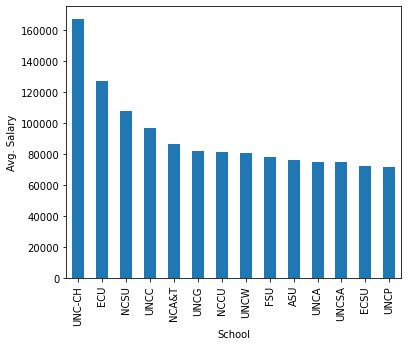

In [4]:
ax = avgsal.plot.bar(figsize=(6, 5), legend=False)
ax.set_xlabel('School')
ax.set_ylabel('Avg. Salary')
plt.show()

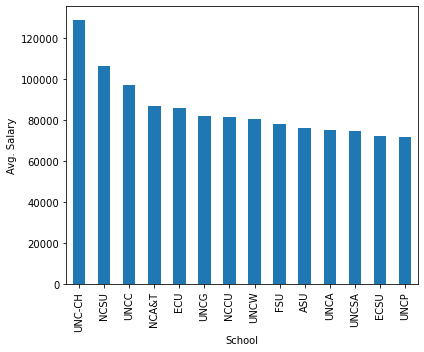

In [5]:
# ECU and UNC-CH are really high, because they both have medical schools.
# Let's remove the medical school salaries, and vet school for doctors from the data.
prof = prof.loc[prof['dept'] != 'Psychiatry/Medicine']
prof = prof.loc[prof['dept'] != 'Veterinary Medicine']
avgsal = prof.groupby(
    'INSTITUTION NAME')['EMPLOYEE ANNUAL BASE SALARY'].mean()
avgsal = avgsal.to_frame()
avgsal = avgsal.sort_values(by='EMPLOYEE ANNUAL BASE SALARY', ascending=False)

ax = avgsal.plot.bar(figsize=(6, 5), legend=False)
ax.set_xlabel('School')
ax.set_ylabel('Avg. Salary')

plt.tight_layout()
plt.show()

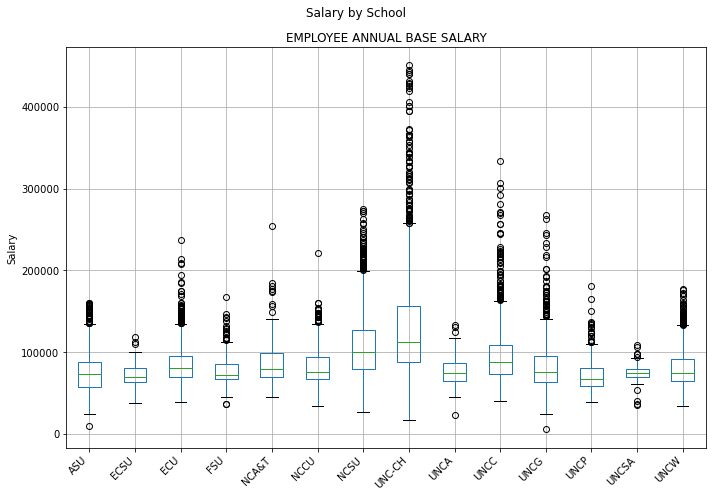

In [6]:
ax = prof.boxplot(by='INSTITUTION NAME', column='EMPLOYEE ANNUAL BASE SALARY',
                 figsize=(10,7))
ax.set_xlabel('')
ax.set_ylabel('Salary')
plt.suptitle('Salary by School')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [7]:
# Make primary working title a ordered category
prof['PRIMARY WORKING TITLE'] = prof['PRIMARY WORKING TITLE'].astype('category')
prof['PRIMARY WORKING TITLE'] = prof[
    'PRIMARY WORKING TITLE'].cat.reorder_categories([
    'Distinguished Professor', 'Professor', 'Associate Professor',
    'Assistant Professor', 'Adjunct Professor', 'Visiting Lecturer',
    'Senior Lecturer', 'Lecturer'], ordered=True)
# Make empl_len timedelta then int
prof['empl_len'] = prof['empl_len'].map(lambda x: 
                                        pd.to_timedelta(x).days)
# Add a student to professor ratio from stats and merge with profs data frame
stats['sp_ratio'] = stats['enrollment'] / stats['profs']
full = pd.merge_ordered(prof, stats, fill_method='ffill',
                       on='INSTITUTION NAME')
full

,INSTITUTION NAME,AGE,INITIAL HIRE DATE,EMPLOYEE ANNUAL BASE SALARY,PRIMARY WORKING TITLE,dept,dept_group,updated,empl_len,school,oos_tuition,is_tuition,profs,enrollment,acceptance,sp_ratio
0,ASU,70,1998-08-01,27000.0,Adjunct Professor,Library Sciences,Humanities,2022-06-30,8734,Appalachian State University,23557,7950,943,20023,0.80,21.233298
1,ASU,64,1998-08-24,24736.0,Adjunct Professor,Library Sciences,Humanities,2022-06-30,8711,Appalachian State University,23557,7950,943,20023,0.80,21.233298
2,ASU,42,2004-12-01,40000.0,Lecturer,Languages/Literature,Humanities,2022-06-30,6420,Appalachian State University,23557,7950,943,20023,0.80,21.233298
3,ASU,42,2021-08-01,68000.0,Assistant Professor,Design,Art/Design,2022-06-30,333,Appalachian State University,23557,7950,943,20023,0.80,21.233298
4,ASU,38,2011-08-26,77086.0,Associate Professor,Psychology,Humanities,2022-06-30,3961,Appalachian State University,23557,7950,943,20023,0.80,21.233298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,UNCW,44,2017-01-03,65030.0,Assistant Professor,Geology/Environmental Sciences,Natural Sciences,2022-06-30,2004,University of North Carolina at Wilmington,21303,7238,718,17915,0.68,24.951253
9894,UNCW,40,2018-08-13,63675.0,Assistant Professor,History/Geography/PoliSci,Humanities,2022-06-30,1417,University of North Carolina at Wilmington,21303,7238,718,17915,0.68,24.951253
9895,UNCW,35,2018-08-13,127800.0,Assistant Professor,Business/Marketing,Business,2022-06-30,1417,University of North Carolina at Wilmington,21303,7238,718,17915,0.68,24.951253
9896,UNCW,54,2018-08-13,99400.0,Associate Professor,Health Science/Nursing,Health Sciences,2022-06-30,1417,University of North Carolina at Wilmington,21303,7238,718,17915,0.68,24.951253


In [8]:
# Average salary by title
title = prof.groupby('PRIMARY WORKING TITLE')[
    'EMPLOYEE ANNUAL BASE SALARY'].mean().sort_values(ascending=False)
title = title.to_frame()
title

,EMPLOYEE ANNUAL BASE SALARY
PRIMARY WORKING TITLE,
Distinguished Professor,204451.216074
Professor,118854.492316
Associate Professor,92181.238424
Assistant Professor,82600.390679
Adjunct Professor,64088.695652
Visiting Lecturer,57358.500000
Senior Lecturer,56776.796277
Lecturer,54944.236971


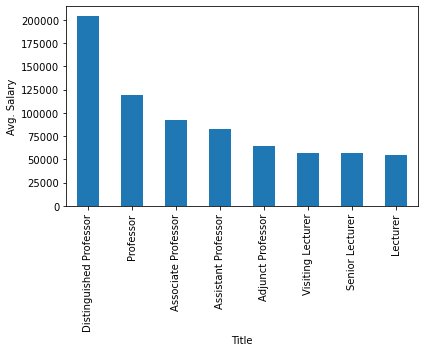

In [9]:
ax = title.plot.bar(figsize=(6,5), legend=False)
ax.set_xlabel('Title')
ax.set_ylabel('Avg. Salary')

plt.tight_layout()
plt.show()

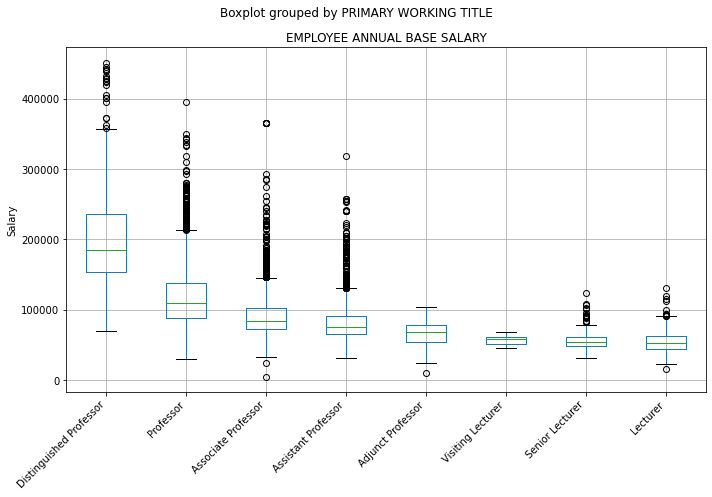

In [10]:
ax = prof.boxplot(by='PRIMARY WORKING TITLE',
                 column='EMPLOYEE ANNUAL BASE SALARY',
                 figsize=(10,7))
ax.set_xlabel('')
ax.set_ylabel('Salary')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

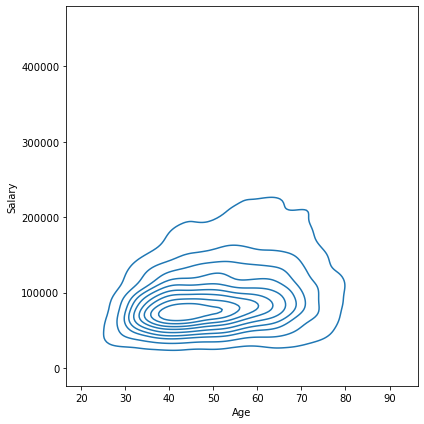

In [11]:
# How does age affect pay?
fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=prof, x='AGE',
           y='EMPLOYEE ANNUAL BASE SALARY', ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Salary')

plt.tight_layout()
plt.show()

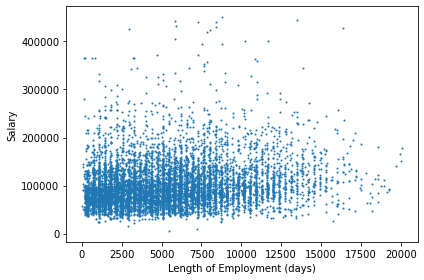

In [12]:
# Length of employment
ax = prof.plot.scatter(x='empl_len', y='EMPLOYEE ANNUAL BASE SALARY',
                      s=1, figsize=(6,4))
ax.set_xlabel('Length of Employment (days)')
ax.set_ylabel('Salary')

plt.tight_layout()
plt.show()

In [28]:
# Department
dep = prof.groupby('dept')[
    'EMPLOYEE ANNUAL BASE SALARY'].mean().sort_values(ascending=False)
dep = dep.to_frame()
dep['count'] = prof.groupby('dept').size()
dep = dep.reset_index()
dep

,dept,EMPLOYEE ANNUAL BASE SALARY,count
0,Business/Marketing,145849.201752,565
1,Finance/Accounting,138652.680535,187
2,Economics,130964.575714,189
3,Public Health,122480.550826,121
4,Computer Science/Engineering,113126.122824,917
5,Biological Sciences,111262.681911,785
6,Agriculture/Forestry/Wildlife,107109.893082,159
7,History/Geography/PoliSci,100107.023711,760
8,Other,97326.605263,38
9,Geology/Environmental Sciences,96156.330894,302


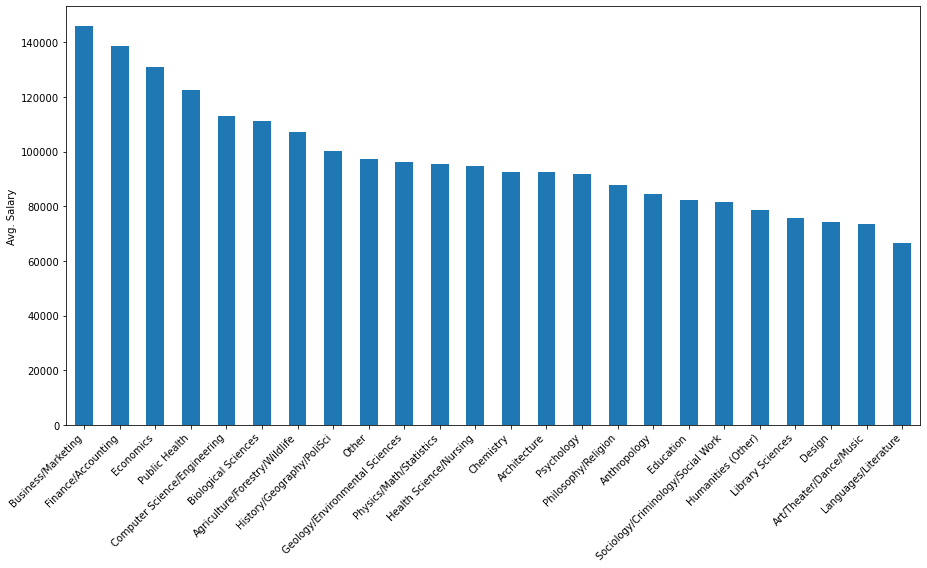

In [29]:
ax = dep.plot.bar(x='dept', y='EMPLOYEE ANNUAL BASE SALARY',
                  figsize=(13,8), legend=False)
ax.set_xlabel('')
ax.set_ylabel('Avg. Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

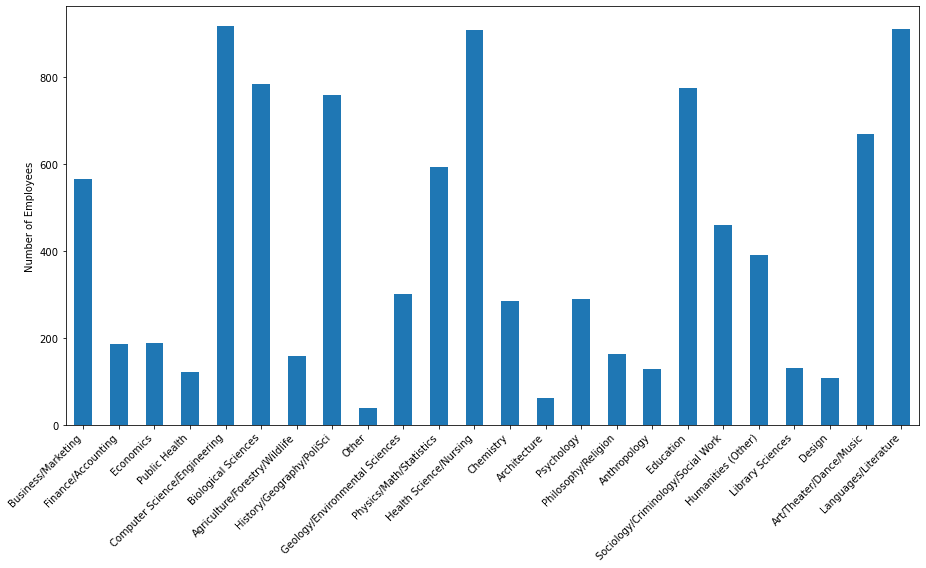

In [30]:
ax = dep.plot.bar(x='dept', y='count',
                  figsize=(13,8), legend=False)
ax.set_xlabel('')
ax.set_ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
group = prof.groupby('dept_group')[
    'EMPLOYEE ANNUAL BASE SALARY'].mean().sort_values(ascending=False)
group = group.to_frame()
group['count'] = prof.groupby('dept_group').size()
group = group.reset_index()
group = group.loc[group['dept_group'] != 'UNDEFINED']
group

,dept_group,EMPLOYEE ANNUAL BASE SALARY,count
0,Business,141429.495282,941
1,Natural Sciences,105302.031457,3041
2,Health Sciences,98138.275306,1029
4,Humanities,82470.475768,3235
5,Education,82323.731082,776
6,Art/Design,75012.514236,838


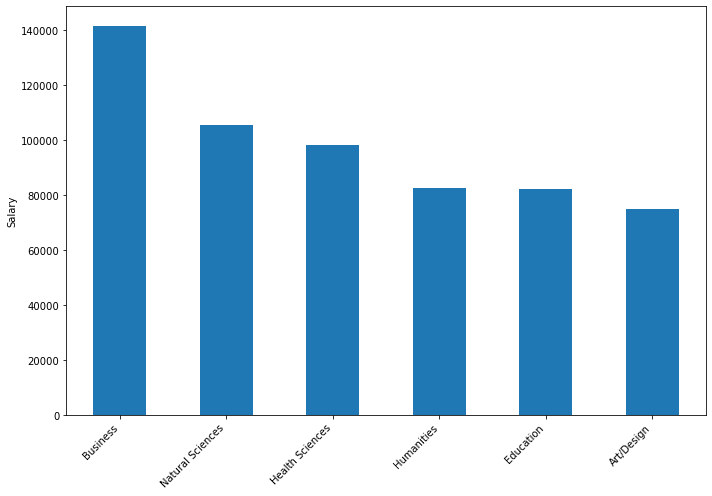

In [38]:
ax = group.plot.bar(x='dept_group', y='EMPLOYEE ANNUAL BASE SALARY',
                   figsize=(10,7), legend=False)
ax.set_xlabel('')
ax.set_ylabel('Salary')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [65]:
group = prof.loc[prof['dept_group'] != 'UNDEFINED'].groupby(
    by=['INSTITUTION NAME', 'dept_group'])['EMPLOYEE ANNUAL BASE SALARY'].mean()
group = group.to_frame()
group = group.pivot_table(values='EMPLOYEE ANNUAL BASE SALARY', columns = 'INSTITUTION NAME', index='dept_group')
group

INSTITUTION NAME,ASU,ECSU,ECU,FSU,NCA&T,NCCU,NCSU,UNC-CH,UNCA,UNCC,UNCG,UNCP,UNCSA,UNCW
dept_group,,,,,,,,,,,,,,
Art/Design,69218.909091,68054.888889,70907.270000,64500.461538,78739.214286,61834.454545,84930.900000,91200.524909,68250.304348,84975.692449,73899.816807,65054.947368,74887.047619,66408.242424
Business,113006.156863,87612.600000,123182.876404,103808.575758,113955.619048,108376.592593,144084.760752,212271.145119,90804.233333,158903.506024,126451.777778,103588.638889,NaN,129823.205128
Education,72403.037037,74633.750000,85976.818182,78138.964286,73187.317073,73896.035088,91978.473684,107882.615385,86413.333333,87259.663333,84265.466145,64726.058824,NaN,74342.580645
Health Sciences,80695.803571,74184.000000,91525.457895,79055.291667,76213.033333,74238.093023,56806.843750,138950.798007,75603.222222,88913.305972,88633.925926,76887.848485,NaN,79924.327869
Humanities,69415.148997,64376.913043,74743.770428,71837.002048,73220.747368,79319.786260,72410.739130,110419.642176,72852.840000,84179.071854,69130.960912,64096.079365,75308.090909,69555.858238
Natural Sciences,75932.212644,70937.928571,85989.043210,74885.438846,89938.004902,90421.049383,117076.505484,132213.428028,76401.035088,102092.371299,78053.373913,71388.732394,72394.000000,81177.006211


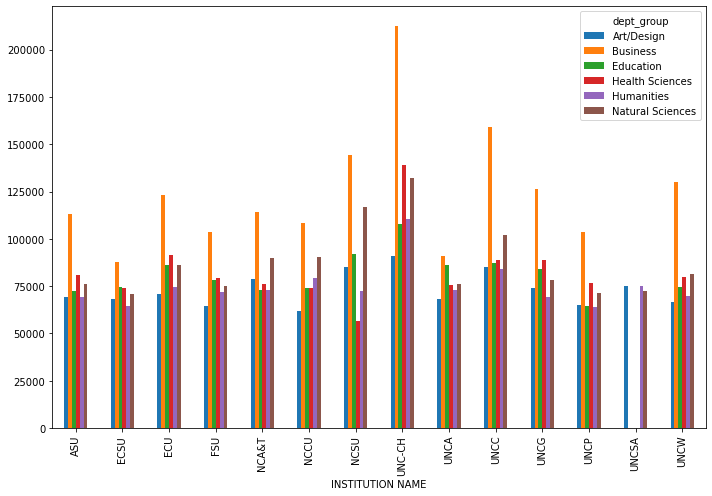

In [66]:
ax =  group.T.plot.bar(figsize=(10,7))
plt.tight_layout()
plt.show()

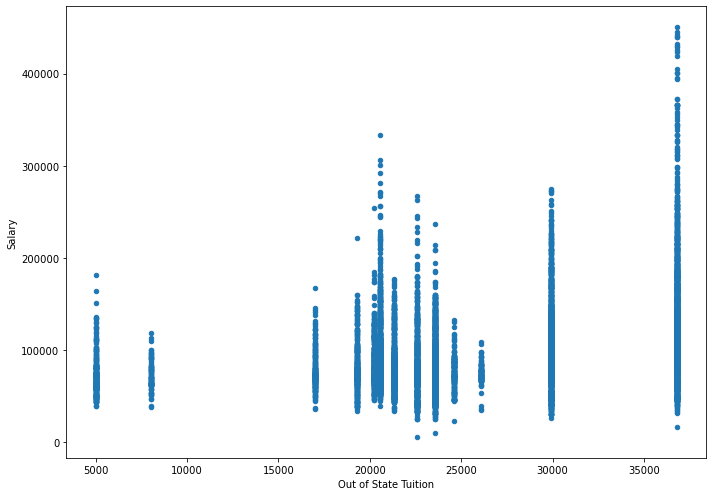

In [41]:
# Out of State tuition and salaries
ax = full.plot.scatter(x='oos_tuition', y='EMPLOYEE ANNUAL BASE SALARY',
                     figsize=('10,7'), legend=False)
ax.set_xlabel('Out of State Tuition')
ax.set_ylabel('Salary')

plt.tight_layout()
plt.show()

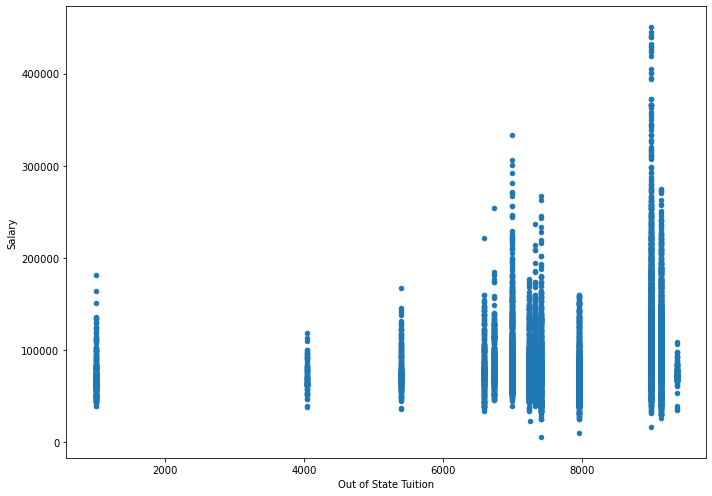

In [42]:
# In State tuition and salaries
ax = full.plot.scatter(x='is_tuition', y='EMPLOYEE ANNUAL BASE SALARY',
                     figsize=(10,7), legend=False)
ax.set_xlabel('Out of State Tuition')
ax.set_ylabel('Salary')

plt.tight_layout()
plt.show()

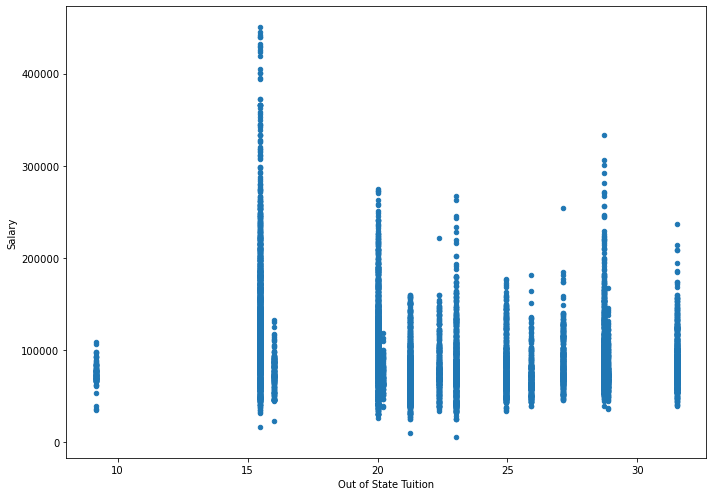

In [43]:
# Student to professor ratio
ax = full.plot.scatter(x='sp_ratio', y='EMPLOYEE ANNUAL BASE SALARY',
                     figsize=(10,7), legend=False)
ax.set_xlabel('Out of State Tuition')
ax.set_ylabel('Salary')

plt.tight_layout()
plt.show()

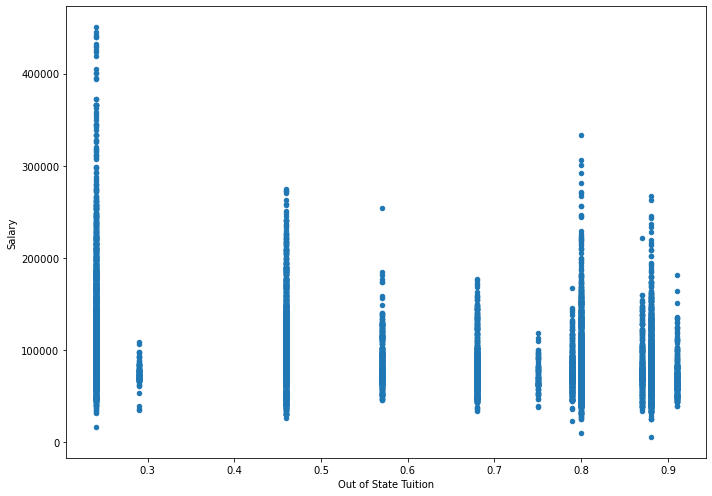

In [44]:
# Acceptance rate
ax = full.plot.scatter(x='acceptance', y='EMPLOYEE ANNUAL BASE SALARY',
                     figsize=(10,7), legend=False)
ax.set_xlabel('Out of State Tuition')
ax.set_ylabel('Salary')

plt.tight_layout()
plt.show()

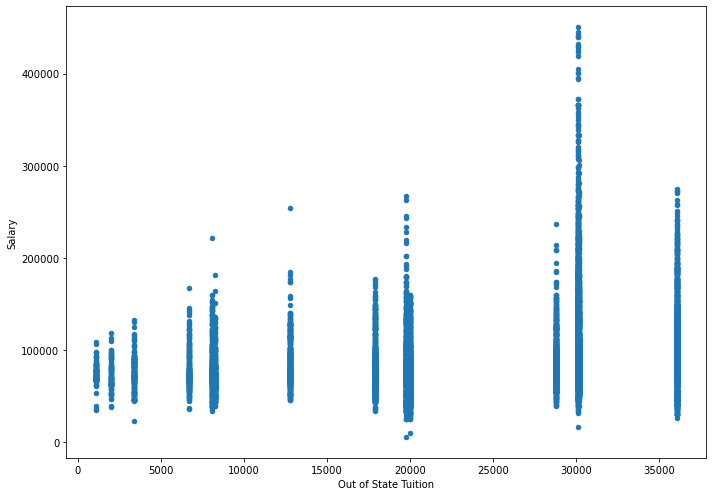

In [45]:
# Enrollment
ax = full.plot.scatter(x='enrollment', y='EMPLOYEE ANNUAL BASE SALARY',
                     figsize=(10,7), legend=False)
ax.set_xlabel('Out of State Tuition')
ax.set_ylabel('Salary')

plt.tight_layout()
plt.show()

In [67]:
#full.to_csv('prof_stats.csv')

## Regression Analysis and More

In [2]:
# Doesn't contain Medical/Psychiatry or Vet                                    
full = pd.read_csv('prof_stats.csv', index_col=0)
full.head()

,INSTITUTION NAME,AGE,INITIAL HIRE DATE,EMPLOYEE ANNUAL BASE SALARY,PRIMARY WORKING TITLE,dept,dept_group,updated,empl_len,school,oos_tuition,is_tuition,profs,enrollment,acceptance,sp_ratio
0,ASU,70,1998-08-01,27000.0,Adjunct Professor,Library Sciences,Humanities,2022-06-30,8734,Appalachian State University,23557,7950,943,20023,0.8,21.233298
1,ASU,64,1998-08-24,24736.0,Adjunct Professor,Library Sciences,Humanities,2022-06-30,8711,Appalachian State University,23557,7950,943,20023,0.8,21.233298
2,ASU,42,2004-12-01,40000.0,Lecturer,Languages/Literature,Humanities,2022-06-30,6420,Appalachian State University,23557,7950,943,20023,0.8,21.233298
3,ASU,42,2021-08-01,68000.0,Assistant Professor,Design,Art/Design,2022-06-30,333,Appalachian State University,23557,7950,943,20023,0.8,21.233298
4,ASU,38,2011-08-26,77086.0,Associate Professor,Psychology,Humanities,2022-06-30,3961,Appalachian State University,23557,7950,943,20023,0.8,21.233298


In [3]:
full['dept_group'].unique()

array(['Humanities', 'Art/Design', 'Education', 'Business',
       'Natural Sciences', 'Health Sciences', 'UNDEFINED'], dtype=object)

In [4]:
drop = full.loc[full['dept_group'] != 'UNDEFINED']
X = pd.get_dummies(drop['dept_group'], drop_first=True)
y = drop['EMPLOYEE ANNUAL BASE SALARY']
dept_model = LinearRegression()
dept_model.fit(X, y)

print(f'Intercept: {dept_model.intercept_:.3f}')
print(f'Coefficients:')
for name, coef in zip(X.columns, dept_model.coef_):
      print(f'{name}: {coef}')

Intercept: 75012.514
Coefficients:
Business: 66416.9810453381
Education: 7311.216846197363
Health Sciences: 23125.761069845586
Humanities: 7457.961531883784
Natural Sciences: 30289.517220480728


In [5]:
full['PRIMARY WORKING TITLE'] = full['PRIMARY WORKING TITLE'].astype('category')
full['PRIMARY WORKING TITLE'] = full[
    'PRIMARY WORKING TITLE'].cat.reorder_categories([
    'Professor', 'Distinguished Professor', 'Associate Professor',
    'Assistant Professor', 'Adjunct Professor', 'Visiting Lecturer',
    'Senior Lecturer', 'Lecturer'], ordered=False)
X = pd.get_dummies(full['PRIMARY WORKING TITLE'], drop_first=True)
y = full['EMPLOYEE ANNUAL BASE SALARY']
title_model = LinearRegression()
title_model.fit(X, y)

print(f'Intercept: {title_model.intercept_:.3f}')
print(f'Coefficients:')
for name, coef in zip(X.columns, title_model.coef_):
      print(f'{name}: {coef}')

Intercept: 118854.492
Coefficients:
Distinguished Professor: 85596.72375799727
Associate Professor: -26673.25389214611
Assistant Professor: -36254.10163688104
Adjunct Professor: -54765.79666365138
Visiting Lecturer: -61495.99231582661
Senior Lecturer: -62077.696038903836
Lecturer: -63910.25534467257


In [6]:
# Make a column for tenure track vs not
tenure = ['Distinguished Professor', 'Professor', 'Assistant Professor', 'Associate Professor']
full['tenure_track'] = [1 if p in tenure else 0 for p in full['PRIMARY WORKING TITLE']]

In [7]:
predictors = ['tenure_track']
outcome = 'EMPLOYEE ANNUAL BASE SALARY'

track = LinearRegression()
track.fit(full[predictors], full[outcome])

print(f'Intercept: {track.intercept_}')
print(f'Coefficient {track.coef_}')

Intercept: 55641.75542016839
Coefficient [46024.91102678]


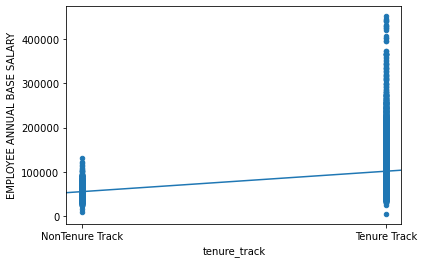

In [8]:
b = track.intercept_
m = track.coef_[0]
ax = full.plot.scatter(x='tenure_track', y=outcome)
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
plt.xticks(ticks=[0,1], labels=['NonTenure Track', 'Tenure Track'])
plt.show()

In [9]:
# Employment length
# Convert days to a year column
full['empl_len'] = full['empl_len'] / 365
year = LinearRegression()
year.fit(full[['empl_len']], full['EMPLOYEE ANNUAL BASE SALARY'])

print(f'Intercept: {year.intercept_}')
print(f'Coefficient {year.coef_}')

Intercept: 82617.11986294332
Coefficient [982.77397793]


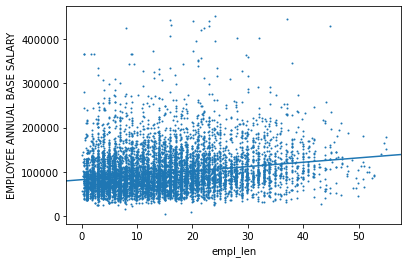

In [10]:
b = year.intercept_
m = year.coef_[0]
ax = full.plot.scatter(x='empl_len', y=outcome, s=1)
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
plt.show()

In [11]:
# Logistic Regression of dept_group, empl_len on Tenure track
predictor = ['empl_len', 'dept_group', 'AGE']
outcome = 'tenure_track'

X = pd.get_dummies(full[predictor], drop_first=True)
y = full[outcome]

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('Intercept: ', logit_reg.intercept_[0])
print('Classes: ', logit_reg.classes_)
print(
    pd.DataFrame({
        'coef': logit_reg.coef_[0]
    }, index=X.columns)
)

Intercept:  0.9304333843264514
Classes:  [0 1]
                                 coef
empl_len                     0.012070
AGE                          0.015594
dept_group_Business          0.276886
dept_group_Education         0.313616
dept_group_Health Sciences   0.280047
dept_group_Humanities       -0.208808
dept_group_Natural Sciences  0.460778
dept_group_UNDEFINED         1.245647


In [12]:
# Logistic Regression of empl_len on tenure track for Humanities and Business
human = full.loc[full['dept_group'] == 'Humanities']
bus = full.loc[full['dept_group'] == 'Business']

# Reorder categories
human['dept'] = human['dept'].astype('category')
dept_names = human['dept'].unique().to_list()
dept_names.remove('Humanities (Other)')
dept_names.insert(0, 'Humanities (Other)')
human['dept'] = human['dept'].cat.reorder_categories(dept_names, ordered=False)

bus['dept'] = bus['dept'].astype('category')
dept_names = bus['dept'].unique().to_list()
dept_names.remove('Economics')
dept_names.insert(0, 'Economics')
bus['dept'] = bus['dept'].cat.reorder_categories(dept_names, ordered=False)

predictors = ['empl_len', 'dept']

X = pd.get_dummies(human[predictors], drop_first=True)
y = human['tenure_track']

human_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
human_reg.fit(X, y)
human_results = pd.DataFrame({
    'coef': human_reg.coef_[0]}, index=X.columns)
print('------Humanities-------')
print(f'Intercept: {human_reg.intercept_}')
print(human_results)

X = pd.get_dummies(bus[predictors], drop_first=True)
y = bus['tenure_track']

bus_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
bus_reg.fit(X, y)
bus_results = pd.DataFrame({
    'coef': bus_reg.coef_[0]}, index=X.columns)
print('--------Business--------')
print(f'Intercept: {bus_reg.intercept_}')
print(bus_results)

------Humanities-------
Intercept: [1.01672866]
                                            coef
empl_len                                0.023297
dept_Library Sciences                   1.420658
dept_Languages/Literature              -0.477743
dept_Psychology                         1.241421
dept_Sociology/Criminology/Social Work  0.449423
dept_History/Geography/PoliSci          1.721353
dept_Philosophy/Religion                0.676733
dept_Anthropology                       0.795124
--------Business--------
Intercept: [2.71648277]
                             coef
empl_len                 0.020721
dept_Business/Marketing -0.879066
dept_Finance/Accounting -1.274006


In [13]:
drop = full.loc[full['dept_group'] != 'UNDEFINED']
predictors = ['INSTITUTION NAME', 'AGE', 'dept_group', 'empl_len', 'tenure_track']
outcome = 'EMPLOYEE ANNUAL BASE SALARY'

X = pd.get_dummies(drop[predictors], drop_first=True)
y = drop[outcome]

complete = sm.OLS(y, X.assign(const=1))
results = complete.fit()
print(results.summary2())

                            Results: Ordinary least squares
Model:                 OLS                            Adj. R-squared:        0.451      
Dependent Variable:    EMPLOYEE ANNUAL BASE SALARY    AIC:                   233218.8813
Date:                  2022-08-23 15:36               BIC:                   233377.1986
No. Observations:      9860                           Log-Likelihood:        -1.1659e+05
Df Model:              21                             F-statistic:           386.5      
Df Residuals:          9838                           Prob (F-statistic):    0.00       
R-squared:             0.452                          Scale:                 1.0938e+09 
----------------------------------------------------------------------------------------
                               Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------------
AGE                            696.4923   41.3732 

In [14]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model


def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)


best_model, best_variables = stepwise_selection(X.columns, train_model, score_model,
                                                verbose=True)

print('------------- Original Stepwise Selection ------------')
print(f'Intercept: {np.array2string(best_model.intercept_, precision=3, floatmode="fixed")}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_.flatten()):
    print(f'{name} {coef}')

Variables: AGE, empl_len, tenure_track, INSTITUTION NAME_ECSU, INSTITUTION NAME_ECU, INSTITUTION NAME_FSU, INSTITUTION NAME_NCA&T, INSTITUTION NAME_NCCU, INSTITUTION NAME_NCSU, INSTITUTION NAME_UNC-CH, INSTITUTION NAME_UNCA, INSTITUTION NAME_UNCC, INSTITUTION NAME_UNCG, INSTITUTION NAME_UNCP, INSTITUTION NAME_UNCSA, INSTITUTION NAME_UNCW, dept_group_Business, dept_group_Education, dept_group_Health Sciences, dept_group_Humanities, dept_group_Natural Sciences
Start: score=239110.46, constant
Step: score=237696.67, add INSTITUTION NAME_UNC-CH
Step: score=236328.43, add dept_group_Business
Step: score=235338.80, add tenure_track
Step: score=234740.74, add dept_group_Natural Sciences
Step: score=234056.49, add AGE
Step: score=233760.86, add INSTITUTION NAME_NCSU
Step: score=233501.68, add INSTITUTION NAME_UNCC
Step: score=233318.72, add dept_group_Health Sciences
Step: score=233285.46, add empl_len
Step: score=233259.30, add INSTITUTION NAME_ECSU
Step: score=233237.84, add dept_group_Educa

In [15]:
ten = full.loc[full['dept_group'] != 'UNDEFINED'].groupby(
    'dept_group')['tenure_track'].value_counts()
ten = ten.unstack()
ten = ten.reset_index()
ten = ten.set_index('dept_group')
ten = ten.rename(columns={0: 'No', 1:"Yes"})
ten.index.name = 'Department Group'
ten

tenure_track,No,Yes
Department Group,,
Art/Design,108,730
Business,101,840
Education,80,696
Health Sciences,112,917
Humanities,516,2719
Natural Sciences,272,2769


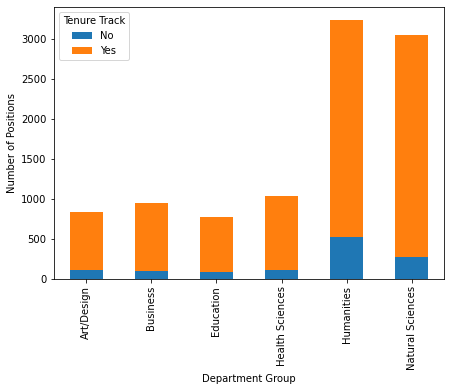

In [16]:
ax = ten.plot.bar(figsize=(7,5), stacked=True)
ax.set_ylabel('Number of Positions')
ax.legend(title='Tenure Track')

plt.show()

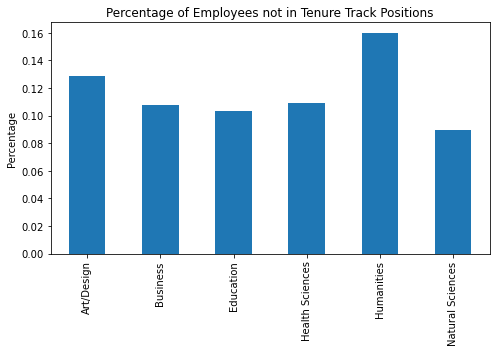

In [17]:
ten["pct_no_ten"] = ten['No'] / (ten['No'] + ten['Yes'])

ax = ten.plot.bar(y='pct_no_ten', figsize=(7, 5), legend=False)
ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Employees not in Tenure Track Positions')

plt.tight_layout()
plt.show()

In [18]:
# Now lets look for every department
every = full.loc[full['dept'] != 'Other'].groupby(
    'dept')['tenure_track'].value_counts()
every = every.unstack()
every = every.reset_index()
every = every.set_index('dept')
every = every.rename(columns={0: 'No', 1:"Yes"})
every.index.name = 'Department'
every

tenure_track,No,Yes
Department,,
Agriculture/Forestry/Wildlife,11,148
Anthropology,14,115
Architecture,4,58
Art/Theater/Dance/Music,89,580
Biological Sciences,62,723
Business/Marketing,63,502
Chemistry,36,248
Computer Science/Engineering,56,861
Design,15,92


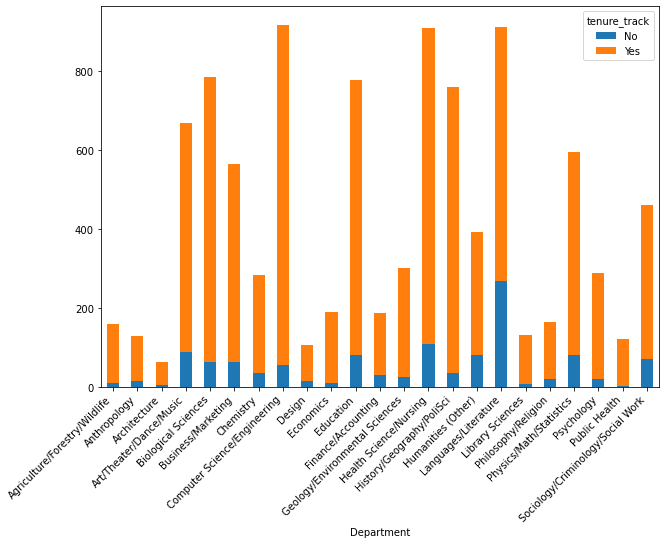

In [19]:
ax = every.plot.bar(figsize=(10,7), stacked=True)
plt.xticks(rotation=45, ha='right')
plt.show()

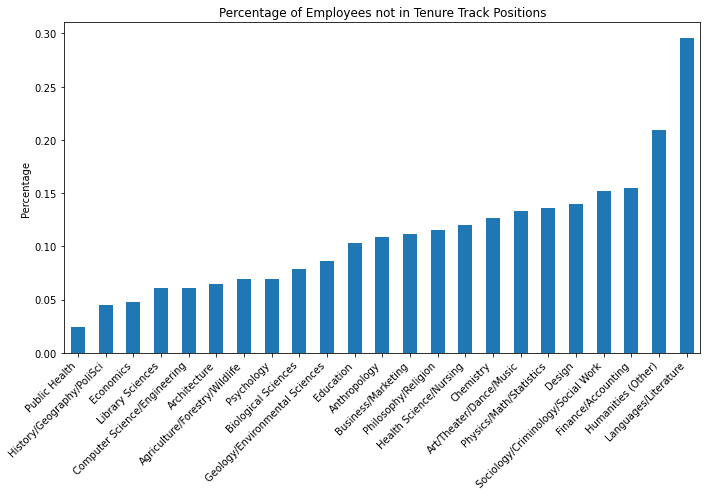

In [20]:
every["pct_no_ten"] = every['No'] / (every['No'] + every['Yes'])
every = every.sort_values(by='pct_no_ten')
ax = every.plot.bar(y='pct_no_ten', figsize=(10, 7), legend=False)
ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Employees not in Tenure Track Positions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [21]:
every['pct_yes_ten'] = every['Yes'] / (every['No'] + every['Yes'])
every = every.round(decimals=2)
every = every[['pct_no_ten', 'pct_yes_ten']]

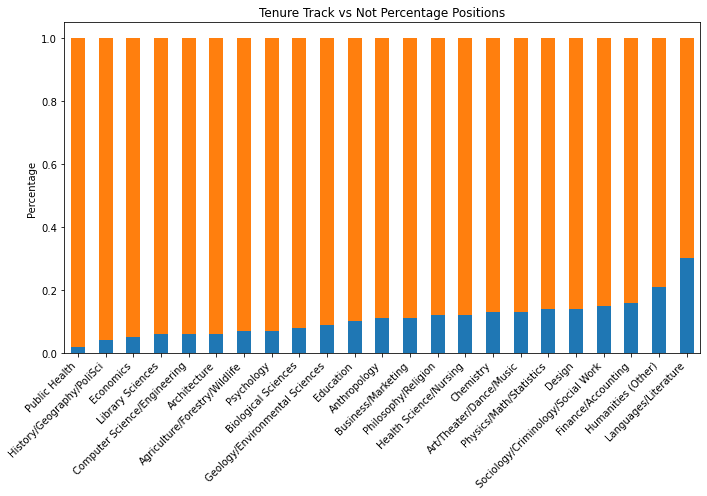

In [22]:
ax = every.plot.bar(figsize=(10, 7), legend=False, stacked=True)
ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('Tenure Track vs Not Percentage Positions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [23]:
drop = full.loc[full['dept'] != 'Other']
drop['dept'] = drop['dept'].astype('category')
dept_names = drop['dept'].unique().to_list()
dept_names.remove('Health Science/Nursing')
dept_names.insert(0, 'Health Science/Nursing')
dept_names
drop['dept'] = drop['dept'].cat.reorder_categories(dept_names, ordered=False)

X = pd.get_dummies(drop['dept'], drop_first=True)
y = drop['EMPLOYEE ANNUAL BASE SALARY']
dept_model = LinearRegression()
dept_model.fit(X, y)

print(f'Intercept: {dept_model.intercept_:.3f}')
print(f'Coefficients:')
for name, coef in zip(X.columns, dept_model.coef_):
      print(f'{name}: {coef}')

Intercept: 94894.426
Coefficients:
Library Sciences: -19317.0950516193
Languages/Literature: -28259.49926552722
Design: -20469.799646753767
Psychology: -3227.2049153240564
Art/Theater/Dance/Music: -21416.879701375376
Humanities (Other): -16426.718832880902
Education: -12570.69473250386
Business/Marketing: 50954.77593723421
Biological Sciences: 16368.25609585013
Computer Science/Engineering: 18231.69700944955
Sociology/Criminology/Social Work: -13182.906617580935
Physics/Math/Statistics: 690.1679560657511
Geology/Environmental Sciences: 1261.9050790617562
History/Geography/PoliSci: 5212.597895548366
Economics: 36070.149899307915
Chemistry: -2293.4254628652893
Philosophy/Religion: -7002.997888148761
Finance/Accounting: 43758.25471978142
Anthropology: -10271.690931257048
Public Health: 27586.125011468393
Architecture: -2304.529363365068
Agriculture/Forestry/Wildlife: 12215.46726678298


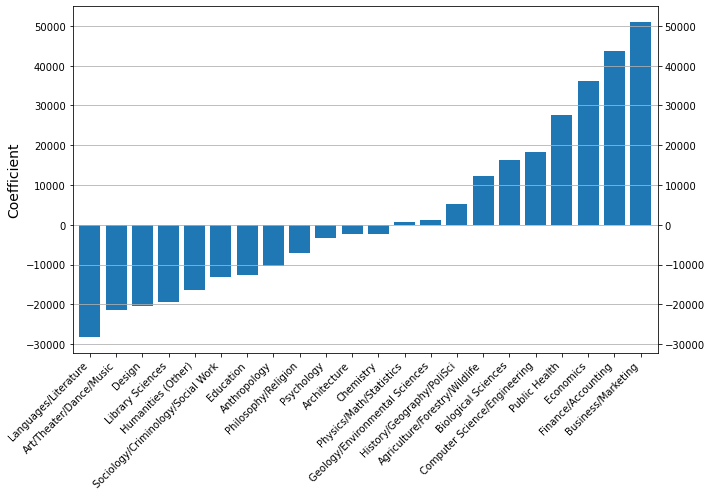

In [24]:
dept_coef = pd.DataFrame([c for c in dept_model.coef_], index = [n for n in X.columns])
dept_coef = dept_coef.sort_values(by=0)
ax = dept_coef.plot.bar(figsize=(10,7), legend=False, width=.8)
ax.set_ylabel('Coefficient', fontsize=14, fontstretch=1000)
ax.grid(axis='y')
ax.tick_params(axis='y', right=True, labelright=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Seperate Regression Tests for Tenure and Non-Tenure Track Positions
yesten = drop.loc[drop['tenure_track'] == 1]
noten = drop.loc[drop['tenure_track'] == 0]

Xyes = pd.get_dummies(yesten['dept'], drop_first=True)
yyes = yesten['EMPLOYEE ANNUAL BASE SALARY']
Xno = pd.get_dummies(noten['dept'], drop_first=True)
yno = noten['EMPLOYEE ANNUAL BASE SALARY']

yesmodel, nomodel = LinearRegression(), LinearRegression()
yesmodel.fit(Xyes, yyes)
nomodel.fit(Xno, yno)

print('Yes Model')
print(f'Intercept: {yesmodel.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(Xyes.columns, yesmodel.coef_):
    print(f'{name}: {coef}')
print('No Model')
print(f'Intercept: {nomodel.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(Xno.columns, nomodel.coef_):
    print(f'{name}: {coef}')

Yes Model
Intercept: 99239.879
Coefficients:
Library Sciences: -21245.738504940076
Languages/Literature: -24022.624859467094
Design: -19764.27070359707
Psychology: -4732.236871367942
Art/Theater/Dance/Music: -22709.152468214532
Humanities (Other): -13737.386098278203
Education: -14183.918637754668
Business/Marketing: 56222.37954497433
Biological Sciences: 16757.288539893434
Computer Science/Engineering: 16428.641018869497
Sociology/Criminology/Social Work: -12372.484642215813
Physics/Math/Statistics: 2638.0819847664757
Geology/Environmental Sciences: 506.82324567847184
History/Geography/PoliSci: 3223.2066475829147
Economics: 34071.09176741762
Chemistry: -1875.2342379587437
Philosophy/Religion: -6435.264364766252
Finance/Accounting: 52430.274145054806
Anthropology: -10847.18548620553
Public Health: 24593.337973632373
Architecture: -4204.990088904285
Agriculture/Forestry/Wildlife: 11074.05978994013
No Model
Intercept: 63041.055
Coefficients:
Library Sciences: -24622.18004587163
Languages

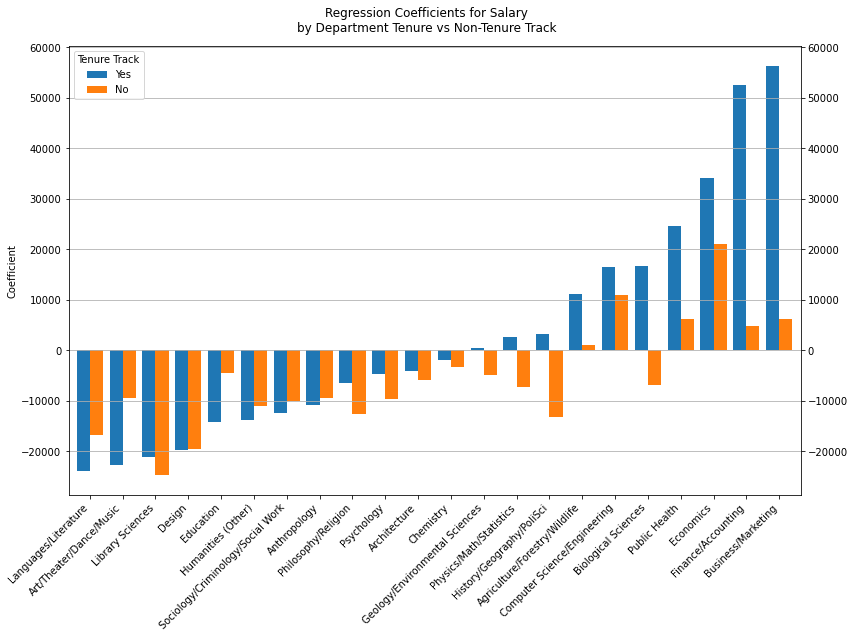

In [26]:
yesno = pd.DataFrame({
    'Yes': [y for y in yesmodel.coef_],
    'No': [n for n in nomodel.coef_],},
    index = [name for name in Xyes.columns])
yesno = yesno.sort_values(by='Yes')

ax = yesno.plot.bar(figsize=(12,9), width=0.8)
ax.legend(title='Tenure Track')
ax.grid(axis='y')
ax.tick_params(axis='y', right=True, labelright='True')
ax.set_ylabel('Coefficient')
plt.xticks(rotation=45, ha='right')
plt.suptitle('Regression Coefficients for Salary\nby Department Tenure vs Non-Tenure Track')

plt.tight_layout()
plt.show()

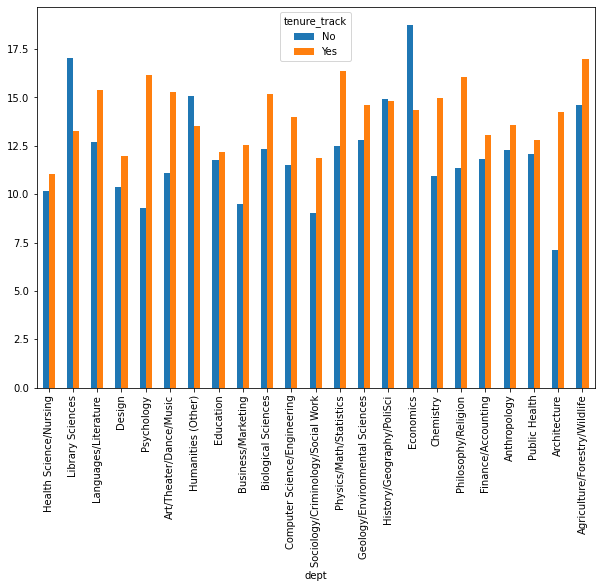

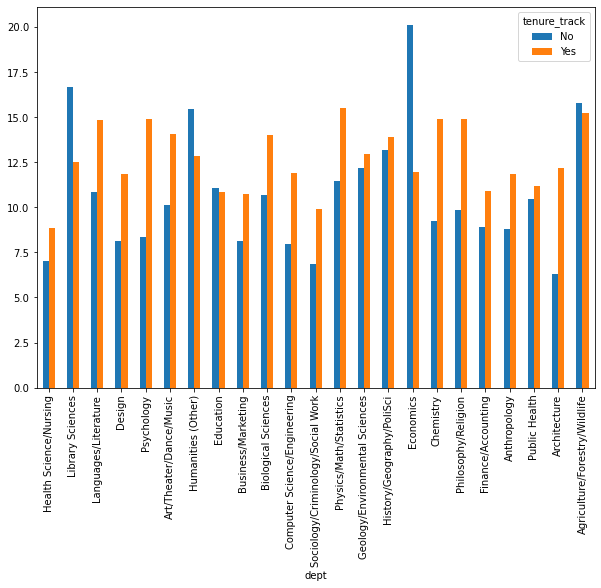

In [27]:
# Average length of employment for tenure vs nontenure mean median
avg = drop.groupby(by=['dept', 'tenure_track'])['empl_len'].mean()
avg = avg.to_frame()
avg = avg.unstack()
avg.columns = avg.columns.droplevel()
avg = avg.rename(columns={0:'No', 1:'Yes'})
avg = avg.sort_values(by='Yes')

med = drop.groupby(by=['dept', 'tenure_track'])['empl_len'].median()
med = med.to_frame()
med = med.unstack()
med.columns = med.columns.droplevel()
med = med.rename(columns={0:'No', 1:'Yes'})
med = med.sort_values(by='Yes')

both = pd.concat([avg, med], keys=['Mean', 'Median'], axis=1)
ax = both.plot.bar(y='Mean', figsize=(10,7))
plt.show()
ax = both.plot.bar(y='Median', figsize=(10,7))
plt.show()

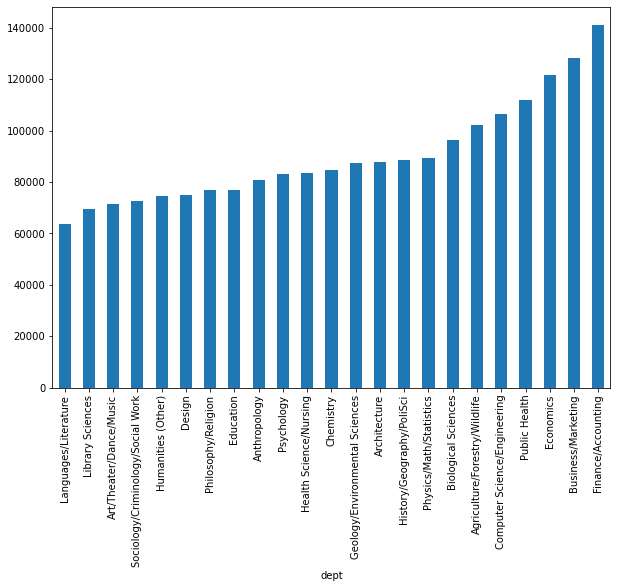

In [28]:
# Looking at Median Salary because I did not look at it in the explore page
medsal = drop.groupby('dept')['EMPLOYEE ANNUAL BASE SALARY'].median()
medsal = medsal.to_frame()
medsal = medsal.sort_values(by='EMPLOYEE ANNUAL BASE SALARY')

ax = medsal.plot.bar(figsize=(10,7), legend=False)
plt.show()